# Unlocking the Charts: The hidden secrets from hits
- The purpose of this capstone is to determine what makes a song popular on Spotify and, more importantly, to create actionable insights that artists and producers can use to maximize their listenership and make their music more successful. As the number of tracks in the world doubles every 12 months, knowing why a song might appeal to a larger audience has become crucial for success in an industry where competition is high and discoverability can be a real challenge. 
- The project deals with a real-world problem, which is of interest to many aspiring and established musicians. The problem is like this: how do you cut the noise and get your music to be heard? Through data analysis and existing literature, this project will aim to present more prescriptive conclusions that inform artists on how to successfully operate within the digital music ecosystem and improve their likelihood of being discovered by a wider audience.

https://www.kaggle.com/datasets/solomonameh/spotify-music-dataset

# -------------


# Data Description and EDA 

In [1]:
#import kagglehub

# Download latest version
#path = kagglehub.dataset_download("solomonameh/spotify-music-dataset")

#print("Path to dataset files:", path)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
#dir_path = "C:\\Users\\junio\\.cache\\kagglehub\\datasets\\solomonameh\\spotify-music-dataset\\versions\\1\\"
dir_path = ''

In [4]:
df_high = pd.read_csv(dir_path + "high_popularity_spotify_data.csv")
df_high['popularity'] = 1
df_low = pd.read_csv(dir_path + "low_popularity_spotify_data.csv")
df_high.head()

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id,popularity
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4,0.0358,...,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1
2,0.808,108.548,0.554,pop,-4.169,0.159,0.372,Gracie Abrams,4,0.0368,...,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1
3,0.910,112.966,0.670,pop,-4.070,0.304,0.786,Sabrina Carpenter,4,0.0634,...,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1
4,0.783,149.027,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",4,0.2600,...,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1


In [5]:
df_low['popularity'] = 0
df_low.head()

,time_signature,track_popularity,speechiness,danceability,playlist_name,track_artist,duration_ms,energy,playlist_genre,playlist_subgenre,...,playlist_id,track_id,valence,key,tempo,loudness,acousticness,liveness,track_album_name,popularity
0,4.0,23,0.0393,0.636,Rock Classics,Creedence Clearwater Revival,138053.0,0.746,rock,classic,...,37i9dQZF1DWXRqgorJj26U,5e6x5YRnMJIKvYpZxLqdpH,0.432,0.0,132.310,-3.785,0.0648,0.1730,The Long Road Home - The Ultimate John Fogerty...,0
1,4.0,53,0.0317,0.572,Rock Classics,Van Halen,241600.0,0.835,rock,classic,...,37i9dQZF1DWXRqgorJj26U,5FqYA8KfiwsQvyBI4IamnY,0.795,0.0,129.981,-6.219,0.1710,0.0702,The Collection,0
2,4.0,55,0.0454,0.591,Rock Classics,Stevie Nicks,329413.0,0.804,rock,classic,...,37i9dQZF1DWXRqgorJj26U,5LNiqEqpDc8TuqPy79kDBu,0.658,0.0,111.457,-7.299,0.3270,0.0818,Bella Donna (Deluxe Edition),0
3,4.0,64,0.1010,0.443,Jazz Classics,"Ella Fitzgerald, Louis Armstrong",185160.0,0.104,jazz,classic,...,37i9dQZF1DXbITWG1ZJKYt,78MI7mu1LV1k4IA2HzKmHe,0.394,0.0,76.474,-17.042,0.9130,0.1910,"Love, Ella",0
4,4.0,62,0.0298,0.685,Jazz Classics,Galt MacDermot,205720.0,0.472,jazz,classic,...,37i9dQZF1DXbITWG1ZJKYt,6MN6yRVriszuyAVlyF8ndB,0.475,9.0,80.487,-9.691,0.7850,0.2240,Shapes of Rhythm/Woman Is Sweeter,0


### Both datasets have the same features, but the columns are in different orders.
    - We need to reorder it
    - the feature popularity is the origin of dataset: if it is high = 1 or low = 0

In [6]:
df_high_columns = df_high.columns.sort_values()
#print(df_high_columns)
#df_high_columns = df_high_columns

In [7]:
df_low_columns = df_low.columns.sort_values()
#print(df_low_columns)
#df_high_columns = df_high_columns

In [8]:
#Both datasets have the same features
print(df_high_columns == df_low_columns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


In [9]:
#df_high = df_high[df_high_columns]
df_low = df_low[df_high.columns]
df_low.head()

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id,popularity
0,0.746,132.310,0.636,rock,-3.785,0.1730,0.432,Creedence Clearwater Revival,4.0,0.0393,...,4A8gFwqd9jTtnsNwUu3OQx,1.0,0.0,138053.0,0.0648,5e6x5YRnMJIKvYpZxLqdpH,classic,audio_features,37i9dQZF1DWXRqgorJj26U,0
1,0.835,129.981,0.572,rock,-6.219,0.0702,0.795,Van Halen,4.0,0.0317,...,2c965LEDRNrXXCeBOAAwns,1.0,0.0,241600.0,0.1710,5FqYA8KfiwsQvyBI4IamnY,classic,audio_features,37i9dQZF1DWXRqgorJj26U,0
2,0.804,111.457,0.591,rock,-7.299,0.0818,0.658,Stevie Nicks,4.0,0.0454,...,3S404OgKoVQSJ3xXrDVlp8,1.0,0.0,329413.0,0.3270,5LNiqEqpDc8TuqPy79kDBu,classic,audio_features,37i9dQZF1DWXRqgorJj26U,0
3,0.104,76.474,0.443,jazz,-17.042,0.1910,0.394,"Ella Fitzgerald, Louis Armstrong",4.0,0.1010,...,1y5KGkUKO0NG32MhIIagCA,1.0,0.0,185160.0,0.9130,78MI7mu1LV1k4IA2HzKmHe,classic,audio_features,37i9dQZF1DXbITWG1ZJKYt,0
4,0.472,80.487,0.685,jazz,-9.691,0.2240,0.475,Galt MacDermot,4.0,0.0298,...,6f4b9wVTkKAf096k4XG6x5,0.0,9.0,205720.0,0.7850,6MN6yRVriszuyAVlyF8ndB,classic,audio_features,37i9dQZF1DXbITWG1ZJKYt,0


### An union of both dataset

In [10]:
# Combine both datasets
df = pd.concat([df_high, df_low], ignore_index=True)
df.head ()

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id,popularity
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3.0,0.0304,...,10FLjwfpbxLmW8c25Xyc2N,0.0,6.0,251668.0,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4.0,0.0358,...,7aJuG4TFXa2hmE4z1yxc3n,1.0,2.0,210373.0,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1
2,0.808,108.548,0.554,pop,-4.169,0.159,0.372,Gracie Abrams,4.0,0.0368,...,0hBRqPYPXhr1RkTDG3n4Mk,1.0,1.0,166300.0,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1
3,0.910,112.966,0.670,pop,-4.070,0.304,0.786,Sabrina Carpenter,4.0,0.0634,...,4B4Elma4nNDUyl6D5PvQkj,0.0,0.0,157280.0,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1
4,0.783,149.027,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",4.0,0.2600,...,2IYQwwgxgOIn7t3iF6ufFD,0.0,0.0,169917.0,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4831 entries, 0 to 4830
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   energy                    4830 non-null   float64
 1   tempo                     4830 non-null   float64
 2   danceability              4830 non-null   float64
 3   playlist_genre            4831 non-null   object 
 4   loudness                  4830 non-null   float64
 5   liveness                  4830 non-null   float64
 6   valence                   4830 non-null   float64
 7   track_artist              4831 non-null   object 
 8   time_signature            4830 non-null   float64
 9   speechiness               4830 non-null   float64
 10  track_popularity          4831 non-null   int64  
 11  track_href                4830 non-null   object 
 12  uri                       4830 non-null   object 
 13  track_album_name          4830 non-null   object 
 14  playlist

In [12]:
df.describe()

,energy,tempo,danceability,loudness,liveness,valence,time_signature,speechiness,track_popularity,instrumentalness,mode,key,duration_ms,acousticness,popularity
count,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4831.000000,4830.000000,4830.000000,4830.000000,4.830000e+03,4830.000000,4831.000000
mean,0.586691,118.269293,0.622311,-9.281627,0.167613,0.481930,3.936646,0.101738,54.761126,0.201053,0.562112,5.233333,2.061508e+05,0.341217,0.348996
std,0.246263,28.512615,0.187706,7.129396,0.124429,0.258036,0.409712,0.101032,19.828573,0.351918,0.496178,3.580857,8.174556e+04,0.325382,0.476702
min,0.000202,48.232000,0.058900,-48.069000,0.021000,0.029600,1.000000,0.021900,11.000000,0.000000,0.000000,0.000000,3.537500e+04,0.000004,0.000000
25%,0.442250,96.063000,0.525000,-10.297750,0.095400,0.275000,4.000000,0.038600,41.000000,0.000000,0.000000,2.000000,1.590000e+05,0.052925,0.000000
50%,0.633000,118.059500,0.653000,-7.191000,0.118000,0.483000,4.000000,0.056100,56.000000,0.000091,1.000000,5.000000,1.948665e+05,0.224500,0.000000
75%,0.777000,136.723500,0.758000,-5.336750,0.195000,0.690000,4.000000,0.118000,72.000000,0.200500,1.000000,8.000000,2.334780e+05,0.590000,1.000000
max,0.998000,241.426000,0.979000,1.318000,0.979000,0.987000,5.000000,0.927000,100.000000,0.991000,1.000000,11.000000,1.355260e+06,0.996000,1.000000


In [13]:
df.isnull().sum()

energy                      1
tempo                       1
danceability                1
playlist_genre              0
loudness                    1
liveness                    1
valence                     1
track_artist                0
time_signature              1
speechiness                 1
track_popularity            0
track_href                  1
uri                         1
track_album_name            1
playlist_name               0
analysis_url                1
track_id                    0
track_name                  0
track_album_release_date    0
instrumentalness            1
track_album_id              0
mode                        1
key                         1
duration_ms                 1
acousticness                1
id                          1
playlist_subgenre           0
type                        1
playlist_id                 0
popularity                  0
dtype: int64

In [14]:
df = df.dropna()
df.isnull().sum()

energy                      0
tempo                       0
danceability                0
playlist_genre              0
loudness                    0
liveness                    0
valence                     0
track_artist                0
time_signature              0
speechiness                 0
track_popularity            0
track_href                  0
uri                         0
track_album_name            0
playlist_name               0
analysis_url                0
track_id                    0
track_name                  0
track_album_release_date    0
instrumentalness            0
track_album_id              0
mode                        0
key                         0
duration_ms                 0
acousticness                0
id                          0
playlist_subgenre           0
type                        0
playlist_id                 0
popularity                  0
dtype: int64

In [15]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4826    False
4827    False
4828    False
4829    False
4830    False
Length: 4829, dtype: bool

In [16]:
df.duplicated().sum()

0

In [17]:
df = df.drop_duplicates()
df.head()

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id,popularity
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3.0,0.0304,...,10FLjwfpbxLmW8c25Xyc2N,0.0,6.0,251668.0,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4.0,0.0358,...,7aJuG4TFXa2hmE4z1yxc3n,1.0,2.0,210373.0,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1
2,0.808,108.548,0.554,pop,-4.169,0.159,0.372,Gracie Abrams,4.0,0.0368,...,0hBRqPYPXhr1RkTDG3n4Mk,1.0,1.0,166300.0,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1
3,0.910,112.966,0.670,pop,-4.070,0.304,0.786,Sabrina Carpenter,4.0,0.0634,...,4B4Elma4nNDUyl6D5PvQkj,0.0,0.0,157280.0,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1
4,0.783,149.027,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",4.0,0.2600,...,2IYQwwgxgOIn7t3iF6ufFD,0.0,0.0,169917.0,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1


### Remove feature not relevant for the analysis

In [18]:
# Convert necessary columns to appropriate data types
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'],  format='%Y-%m-%d', errors='coerce')

In [19]:
# Extract year, month, and day from 'track_album_release_date'
df['release_year'] = df['track_album_release_date'].dt.year
df['release_month'] = df['track_album_release_date'].dt.month
df['release_day'] = df['track_album_release_date'].dt.day

In [20]:
# Dropping columns with no values for the analysis
no_values_columns = ['track_id', 'track_album_id', 'playlist_id', 'id', 'track_href', 'analysis_url', 'uri', 'type']
df.drop(columns=no_values_columns, inplace=True)

In [21]:
# Check the shape of the combined dataset
print(f'Total records: {df.shape[0]}')
print(f'Total features: {df.shape[1]}')

Total records: 4829
Total features: 25


In [22]:
# Calculate the percentage of missing values
print(df.isnull().sum())
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
missing_percent = pd.DataFrame({'Missing Percentage': missing_percent})
missing_percent

energy                        0
tempo                         0
danceability                  0
playlist_genre                0
loudness                      0
liveness                      0
valence                       0
track_artist                  0
time_signature                0
speechiness                   0
track_popularity              0
track_album_name              0
playlist_name                 0
track_name                    0
track_album_release_date    138
instrumentalness              0
mode                          0
key                           0
duration_ms                   0
acousticness                  0
playlist_subgenre             0
popularity                    0
release_year                138
release_month               138
release_day                 138
dtype: int64


,Missing Percentage
track_album_release_date,2.857735
release_year,2.857735
release_month,2.857735
release_day,2.857735


In [23]:
# Dealing with missing values from track_album_release_date, release_year, release_month, and release_day
print(df['track_album_release_date'].isnull().sum())
df['track_album_release_date'] = df['track_album_release_date'].fillna(0)
df['release_year'] = df['release_year'].fillna(0)
df['release_month'] = df['release_month'].fillna(0)
df['release_day'] = df['release_day'].fillna(0)
print(df.isnull().sum())

138
energy                      0
tempo                       0
danceability                0
playlist_genre              0
loudness                    0
liveness                    0
valence                     0
track_artist                0
time_signature              0
speechiness                 0
track_popularity            0
track_album_name            0
playlist_name               0
track_name                  0
track_album_release_date    0
instrumentalness            0
mode                        0
key                         0
duration_ms                 0
acousticness                0
playlist_subgenre           0
popularity                  0
release_year                0
release_month               0
release_day                 0
dtype: int64


In [24]:
df.dtypes

energy                      float64
tempo                       float64
danceability                float64
playlist_genre               object
loudness                    float64
liveness                    float64
valence                     float64
track_artist                 object
time_signature              float64
speechiness                 float64
track_popularity              int64
track_album_name             object
playlist_name                object
track_name                   object
track_album_release_date     object
instrumentalness            float64
mode                        float64
key                         float64
duration_ms                 float64
acousticness                float64
playlist_subgenre            object
popularity                    int64
release_year                float64
release_month               float64
release_day                 float64
dtype: object

# Mode and Key:

## Key:
- Focuses on the tonal center and overall harmonic structure.
- Often defined by a key signature.
- Can be seeing as category data
## Mode:
- Focuses on the specific arrangement of intervals within a scale.
- Creates different melodic and harmonic flavors.
- Can be seeing as category data
## Tempo:

- Definition: Tempo is the speed or pace of a piece of music.   
- It's typically measured in beats per minute (BPM).
- Can be seeing as float data

## Time signatures
- Provide the rhythmic framework for a piece of music, dictating how the beats are organized within each measure.
- Can be seeing as integer data



In [25]:
# Convert 'key' and 'mode' to categorical
df['key'] = df['key'].astype('category')
df['mode'] = df['mode'].astype('category')
# Convert release_year, release_month, and release_day to integer
df.release_year = df.release_year.astype(int)
df.release_month = df.release_month.astype(int) 
df.release_day = df.release_day.astype(int) 
df.time_signature = df.time_signature.astype(int) 

df.dtypes

energy                       float64
tempo                        float64
danceability                 float64
playlist_genre                object
loudness                     float64
liveness                     float64
valence                      float64
track_artist                  object
time_signature                 int32
speechiness                  float64
track_popularity               int64
track_album_name              object
playlist_name                 object
track_name                    object
track_album_release_date      object
instrumentalness             float64
mode                        category
key                         category
duration_ms                  float64
acousticness                 float64
playlist_subgenre             object
popularity                     int64
release_year                   int32
release_month                  int32
release_day                    int32
dtype: object

In [26]:
#Derivated columns from the dataset with scale features
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
df[features].describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000
mean,0.622299,0.586621,-9.283028,0.101747,0.341279,0.201094,0.167609,0.481851,118.271840
std,0.187723,0.246240,7.129469,0.101040,0.325387,0.351943,0.124442,0.258006,28.515018
min,0.058900,0.000202,-48.069000,0.021900,0.000004,0.000000,0.021000,0.029600,48.232000
25%,0.525000,0.442000,-10.298000,0.038600,0.053000,0.000000,0.095400,0.275000,96.063000
50%,0.653000,0.633000,-7.191000,0.056100,0.225000,0.000092,0.118000,0.483000,118.068000
75%,0.758000,0.777000,-5.339000,0.118000,0.590000,0.201000,0.195000,0.690000,136.732000
max,0.979000,0.998000,1.318000,0.927000,0.996000,0.991000,0.979000,0.987000,241.426000


# Feature Scaling Process

## Key Operations
- **Feature Selection**: Identifies key musical attributes for scaling
- **Name Creation**: Generates new column names with 'scaled_' prefix
- **Transform**: Applies MinMaxScaler to normalize values between 0 and 1

## Purpose
- **Normalization**: Brings all features to same scale (0-1)
- **Comparison**: Enables fair comparison between different features
- **Model Performance**: Improves machine learning model performance
- **Feature Preservation**: Keeps original features while adding scaled versions

## Benefits
- **Equal Feature Weight**: Prevents features with larger ranges from dominating
- **Model Stability**: Helps with gradient descent convergence
- **Interpretability**: Makes feature comparisons more intuitive
- **Original Data**: Maintains original values for reference

This scaling step is crucial for preparing the data for machine learning models while preserving the original features for analysis.

In [27]:
from sklearn.preprocessing import MinMaxScaler

# Create derived columns for scaled features

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the features and add them as new columns
scaled_features = ['scaled_' + feature for feature in features]
df[scaled_features] = scaler.fit_transform(df[features])

# Display the first few rows to verify the scaled columns
df[scaled_features].head()

,scaled_danceability,scaled_energy,scaled_loudness,scaled_speechiness,scaled_acousticness,scaled_instrumentalness,scaled_liveness,scaled_valence,scaled_tempo
0,0.502228,0.593104,0.815842,0.009391,0.309234,0.000000,0.105428,0.527888,0.568015
1,0.747853,0.507916,0.767368,0.015357,0.200800,0.061352,0.100209,0.426572,0.293725
2,0.538094,0.809581,0.888898,0.016462,0.214857,0.000000,0.144050,0.357635,0.312204
3,0.664167,0.911806,0.890902,0.045851,0.094274,0.000000,0.295407,0.790056,0.335073
4,0.780459,0.784526,0.882661,0.263065,0.028410,0.000000,0.348643,0.949864,0.521729


# Strategic Thinking Capstone project with a music and artist dataset

## Proposal:

- Phe problem: How to help artists and producers increase the popularity of their songs.

## Analysis Questions and Insights:

### Music Characteristics and Popularity:
- Which musical characteristics (tempo, mode, duration, etc.) are most associated with a song's popularity?
- Are there patterns or trends in the structure of the most popular songs?
- How do a song's energy, danceability, and sonic qualities relate to its popularity?
### Artists and Trends:
- Which artists have the highest number of popular songs, and what characteristics differentiate them?
- How does an artist's popularity affect the performance of their songs?
- Are there genre or style trends that are rising or declining?
- How does the length of an artist's career influence their popularity?
### Genre Analysis:
- How do the musical characteristics that lead to popularity vary across different genres?
- Are there specific genres where certain musical features are more important for achieving popularity?
- How does the subgenre affect the songs popularity?

## Detailed Analysis of Features and Questions:



## Musical Characteristics and Popularity (In-Depth):
### Energy, Danceability, Valence, Loudness:
- How does the combination of these features (energy, danceability, positivity, and volume) influence song popularity in different genres(playlist_genre) and subgenres (playlist_subgenre)?
- Are there specific thresholds for these features that maximize popularity?
### Tempo, Duration_ms, Time_signature:
- What is the ideal tempo for successful songs in each genre? 
- Does song duration have a significant impact on popularity?
- How does the time signature (time_signature) affect danceability and popularity?
### Acousticness, Instrumentalness, Speechiness, Liveness:
- How does the presence of acoustic, instrumental, spoken word, and live recording elements correlate with popularity?
- Are there genres in which instrumentalization is more popular?
### Mode, Key:
- Which musical modes and keys are most popular in different genres?
- Is there a preference for songs in major or minor modes?

# EDA

- ### How does the combination of these features (energy, danceability, positivity, and volume) influence song popularity in different genres(playlist_genre) and subgenres (playlist_subgenre)?

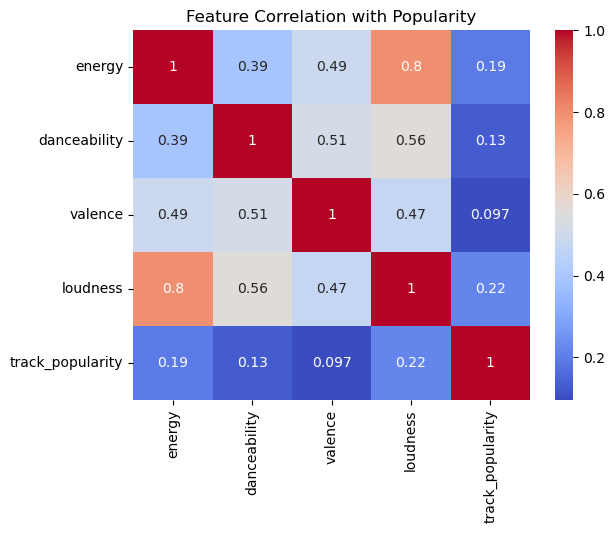

energy: 0.22
danceability: 0.23
valence: 0.22
loudness: 0.33
RMSE: 18.32


c:\Users\junio\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



# Filter relevant columns
features = ['energy', 'danceability', 'valence', 'loudness']
target = 'track_popularity'
X = df[features]
y = df[target]

# Correlation heatmap
sns.heatmap(df[features + [target]].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Popularity')
plt.show()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Feature importance
importances = model.feature_importances_
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance:.2f}")

# Evaluate model
y_pred = model.predict(X_test)
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")

### - Are there patterns or trends in the structure of the most popular songs?

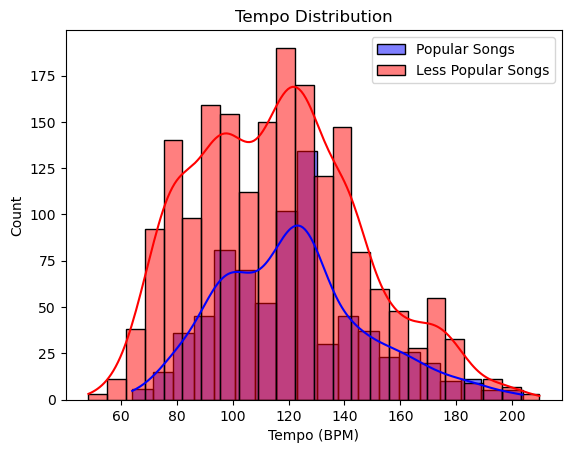

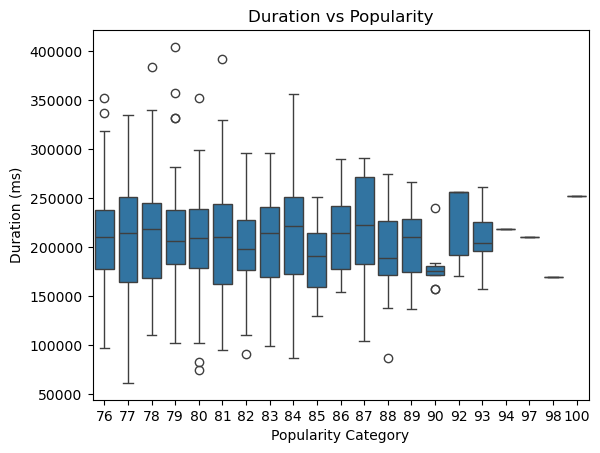

<Figure size 2000x1200 with 0 Axes>

Popular Keys:
 key
1.0     0.132802
11.0    0.107570
0.0     0.102258
7.0     0.099602
2.0     0.088977
5.0     0.088977
6.0     0.083665
9.0     0.073041
4.0     0.070385
10.0    0.065073
8.0     0.050465
3.0     0.037185
Name: proportion, dtype: float64
Popular Modes:
 mode
1.0    0.590969
0.0    0.409031
Name: proportion, dtype: float64


In [29]:
# Define popular and less popular songs
popular_songs = df[df['track_popularity'] > 75]
less_popular_songs = df[df['track_popularity'] < 50]

# Analyze tempo
sns.histplot(popular_songs['tempo'], color='blue', label='Popular Songs', kde=True)
sns.histplot(less_popular_songs['tempo'], color='red', label='Less Popular Songs', kde=True)
plt.title('Tempo Distribution')
plt.xlabel('Tempo (BPM)')
plt.legend()
plt.show()

# Analyze duration
sns.boxplot(data=popular_songs, x='track_popularity', y='duration_ms')
plt.title('Duration vs Popularity')
plt.xlabel('Popularity Category')
plt.ylabel('Duration (ms)')
plt.figure(figsize=(20, 12))
plt.show()

# Analyze key and mode
popular_keys = popular_songs['key'].value_counts(normalize=True)
popular_modes = popular_songs['mode'].value_counts(normalize=True)
print("Popular Keys:\n", popular_keys)
print("Popular Modes:\n", popular_modes)

### - What is the ideal tempo for successful songs in each genre? Does song duration have a significant impact on popularity?

# Tempo and Duration Analysis Step

## Code Explanation
This step analyzes two key musical characteristics:
- Tempo distribution across genres
- Relationship between song duration and popularity

### 1. Tempo Analysis
- Filters songs with popularity > 75
- Calculates average tempo for each genre

### 2. Visualizations
Creates three plots:
- Genre Tempo Distribution (Box Plot)
- Duration vs Popularity (Scatter Plot)
- Additional subgenre plot (commented out)

## Data Interpretation

### Tempo Distribution by Genre
- Shows range and distribution of tempos within each genre
- Box shows median, quartiles, and outliers
- Helps identify genre-specific tempo preferences

### Duration vs Popularity Relationship
**Key findings**:
- Relationship between song length and popularity
- Genre-specific duration patterns
- Potential sweet spots for song length

## Insights
- **Genre-Specific Tempos**: Different genres show distinct tempo preferences
- **Duration Impact**: Shows optimal song lengths for popularity
- **Genre Variations**: Reveals how duration preferences vary by genre
- **Outlier Analysis**: Identifies unusual cases in both tempo and duration

This analysis helps artists and producers make informed decisions about song tempo and duration based on their genre and target audience.

Average Tempo by Genre for Popular Songs:
playlist_genre
soul          159.920000
j-pop         153.468000
punk          136.510286
indie         132.988500
k-pop         128.828400
gaming        126.976963
electronic    126.343542
arabic        125.504056
hip-hop       124.219427
rock          123.499378
pop           120.707676
ambient       120.214200
metal         115.711333
latin         115.014740
folk          114.401500
brazilian     114.394500
r&b           113.490500
world         110.827000
reggae        103.314000
blues         101.837750
afrobeats     100.221000
Name: tempo, dtype: float64


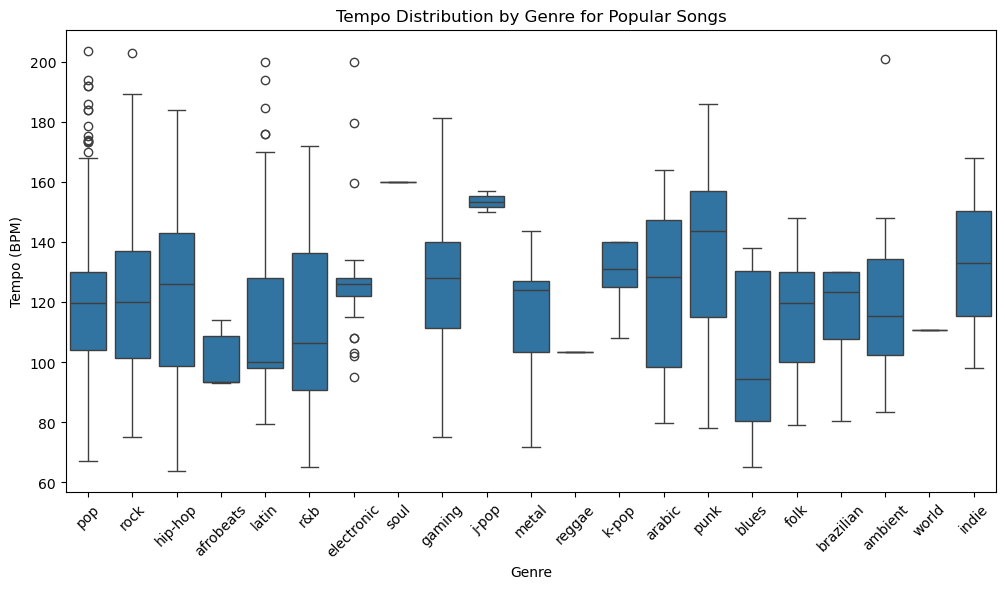

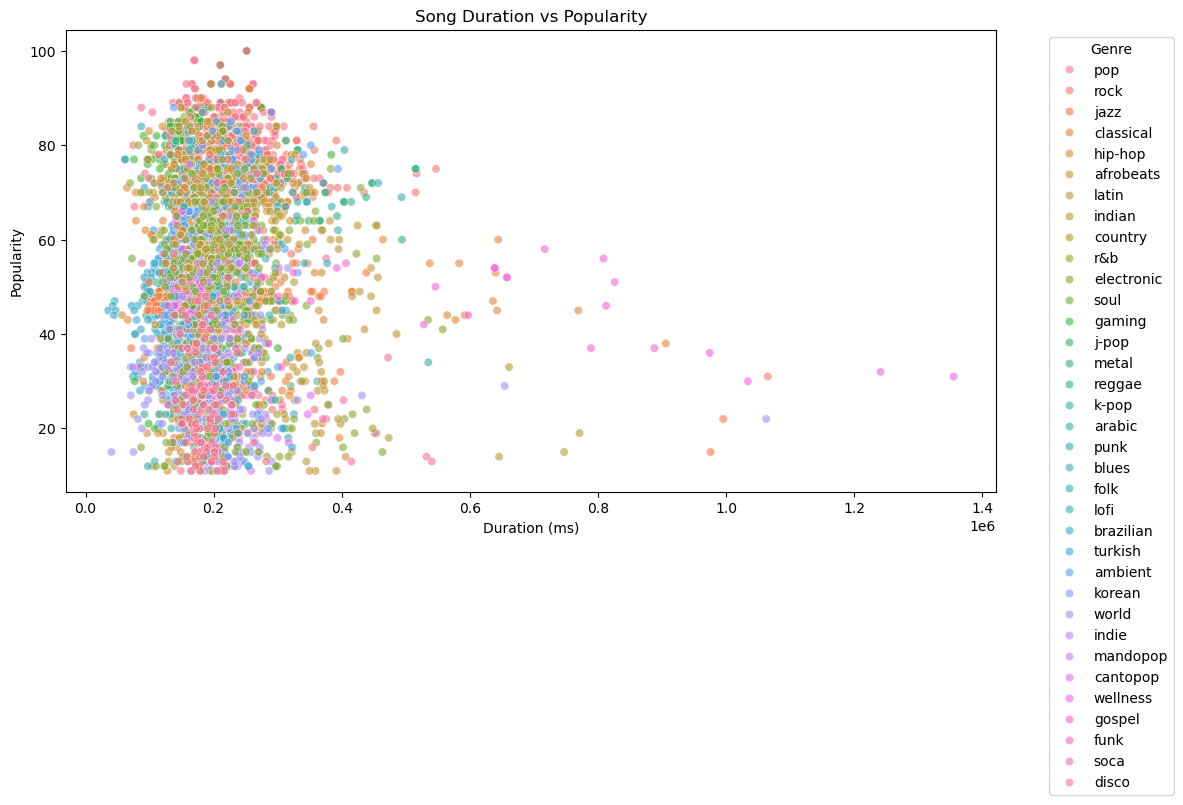

In [30]:
### - What is the ideal tempo for successful songs in each genre? Does song duration have a significant impact on popularity?
# Group by genre and calculate the average tempo for popular songs
popular_songs = df[df['track_popularity'] > 75]
avg_tempo_by_genre = popular_songs.groupby('playlist_genre')['tempo'].mean().sort_values(ascending=False)
print("Average Tempo by Genre for Popular Songs:")
print(avg_tempo_by_genre)

# Visualize tempo distribution for popular songs by genre
plt.figure(figsize=(12, 6))
sns.boxplot(data=popular_songs, x='playlist_genre', y='tempo')
plt.title('Tempo Distribution by Genre for Popular Songs')
plt.xlabel('Genre')
plt.ylabel('Tempo (BPM)')
plt.xticks(rotation=45)
plt.show()

# Analyze the relationship between song duration and popularity
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='duration_ms', y='track_popularity', hue='playlist_genre', alpha=0.6)
plt.title('Song Duration vs Popularity')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Analyze the relationship between song duration and popularity
#plt.figure(figsize=(12, 6))
#sns.scatterplot(data=df, x='duration_ms', y='track_popularity', hue='playlist_subgenre', alpha=0.6)
#plt.title('Song Duration vs Popularity')
#plt.xlabel('Duration (ms)')
#plt.ylabel('Popularity')
#plt.legend(title='Sub genre', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.show()

### - How does the time signature (time_signature) affect danceability and popularity?

# Time Signature Analysis Step

## Code Breakdown

### 1. Data Aggregation
- Groups data by time signature
- Calculates mean danceability and popularity for each signature

### 2. Visualization Setup
- Creates side-by-side subplots
- Sets figure size for optimal viewing

### 3. Plot Creation
Two bar plots showing:
- Danceability vs Time Signature
- Popularity vs Time Signature

## Data Interpretation

### Danceability Plot
**Key findings**:
- Shows how different time signatures affect danceability
- Indicates which signatures are most conducive to dance music
- Reveals patterns in rhythmic structure preferences

### Popularity Plot
**Insights**:
- Demonstrates relationship between time signature and song popularity
- Shows which time signatures tend to be more successful
- Indicates listener preferences for different rhythmic structures

## Key Insights
- **Correlation**: Shows whether more danceable time signatures are also more popular
- **Genre Impact**: Different time signatures may be more successful in different genres
- **Commercial Appeal**: Indicates which time signatures might lead to greater commercial success
- **Musical Structure**: Reveals preferences for different rhythmic organizations

This analysis helps artists and producers choose time signatures that might enhance both danceability and popularity of their songs.

                danceability  track_popularity
time_signature                                
1                   0.406749         50.837838
3                   0.414147         53.508671
4                   0.646018         55.065425
5                   0.477412         49.847682


C:\Users\junio\AppData\Local\Temp\ipykernel_32956\4230508177.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_signature_analysis.index, y=time_signature_analysis['danceability'], ax=ax[0], palette='viridis')
C:\Users\junio\AppData\Local\Temp\ipykernel_32956\4230508177.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_signature_analysis.index, y=time_signature_analysis['track_popularity'], ax=ax[1], palette='viridis')


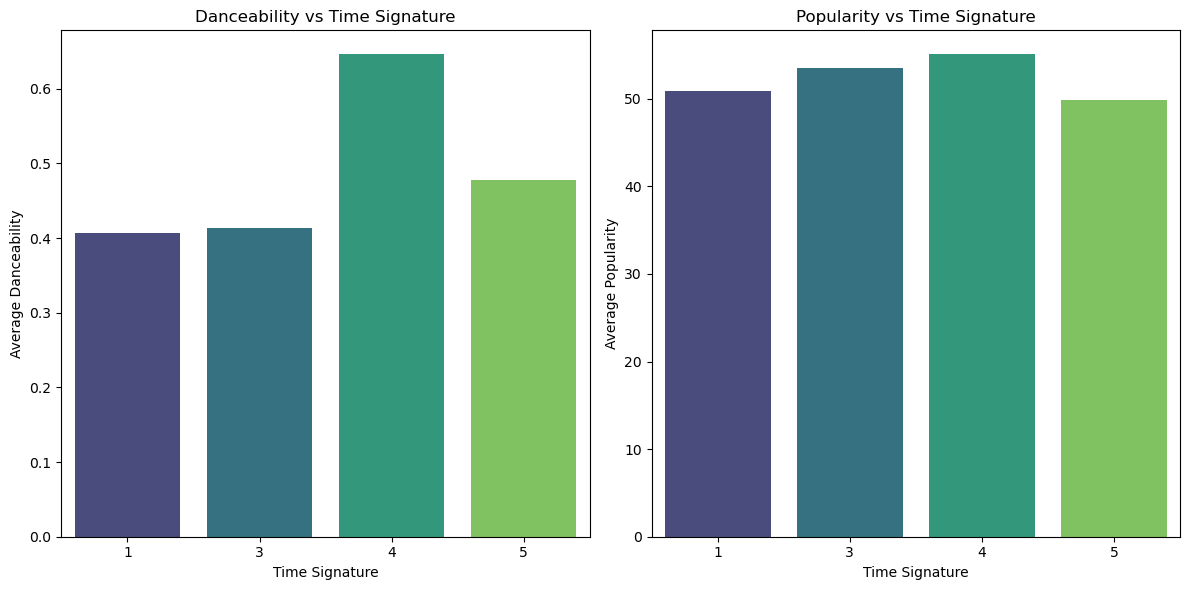

In [31]:
### - How does the time signature (time_signature) affect danceability and popularity?
# Group by time_signature and calculate mean danceability and popularity
time_signature_analysis = df.groupby('time_signature')[['danceability', 'track_popularity']].mean()

# Display the results
print(time_signature_analysis)

# Visualize the relationship
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Danceability vs Time Signature
sns.barplot(x=time_signature_analysis.index, y=time_signature_analysis['danceability'], ax=ax[0], palette='viridis')
ax[0].set_title('Danceability vs Time Signature')
ax[0].set_xlabel('Time Signature')
ax[0].set_ylabel('Average Danceability')

# Popularity vs Time Signature
sns.barplot(x=time_signature_analysis.index, y=time_signature_analysis['track_popularity'], ax=ax[1], palette='viridis')
ax[1].set_title('Popularity vs Time Signature')
ax[1].set_xlabel('Time Signature')
ax[1].set_ylabel('Average Popularity')

plt.tight_layout()
plt.show()

### - Which artists have the highest number of popular songs, and what characteristics differentiate them?

# Popular Artists Analysis Step

## Code Breakdown

### 1. Data Filtering
- Sets threshold at 75 for high popularity
- Filters dataset to include only popular songs

### 2. Artist Analysis
- Counts number of popular songs per artist
- Shows top 10 most successful artists

### 3. Musical Characteristics
- Analyzes key musical features
- Calculates average characteristics for each top artist

## Data Interpretation

### Output Analysis
**Popular Songs Count**:
- Shows which artists have most songs above popularity threshold
- Indicates consistency in producing popular music

**Musical Characteristics**:
- **Energy**: Shows intensity level of songs
- **Danceability**: Indicates rhythm suitability for dancing
- **Valence**: Reveals emotional tone of music
- **Tempo**: Shows preferred speed/pace of songs

## Key Insights
- **Success Patterns**: Reveals common characteristics among successful artists
- **Style Signatures**: Shows unique musical approaches of top artists
- **Genre Impact**: Indicates which musical elements contribute to popularity
- **Production Guidance**: Provides benchmarks for aspiring artists

This analysis helps understand what makes certain artists consistently successful and provides actionable insights for music production.

Top 10 Artists with the Most Popular Songs:
track_artist
Sabrina Carpenter        11
Linkin Park              10
Red Hot Chili Peppers     8
Hozier                    8
Bruno Mars                8
Coldplay                  6
AC/DC                     6
Juice WRLD                6
Avicii                    6
Gunna                     6
Name: count, dtype: int64


C:\Users\junio\AppData\Local\Temp\ipykernel_32956\1279761852.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=artist_popularity_count.index, y=artist_popularity_count.values, palette='viridis')


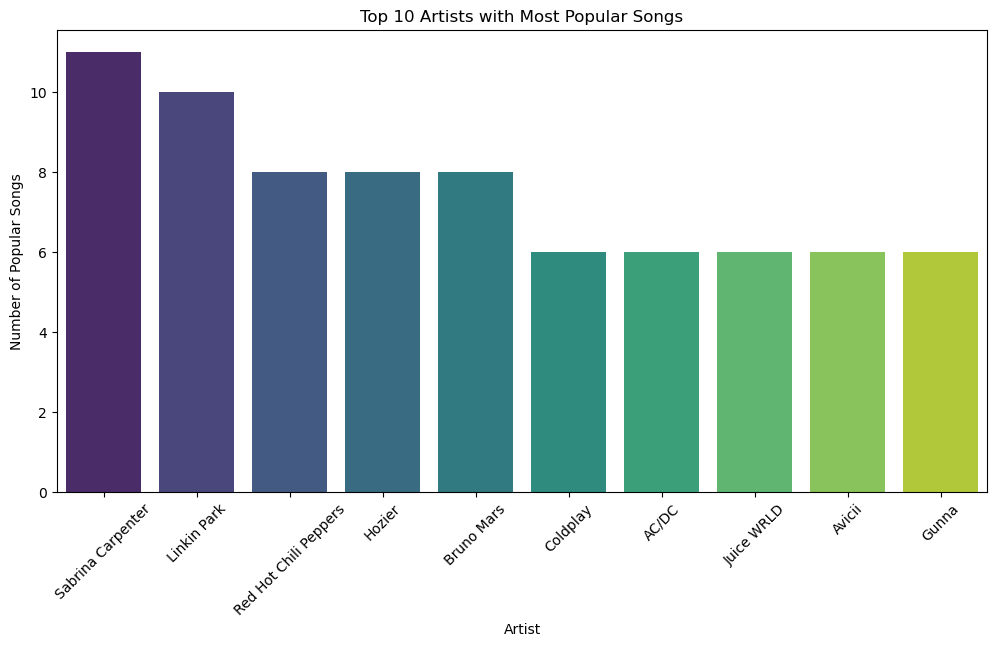


Average Characteristics of Popular Songs by Top Artists:
                         energy  danceability   valence       tempo
track_artist                                                       
AC/DC                  0.789500      0.460000  0.619667  146.790333
Avicii                 0.802333      0.554667  0.606833  126.347333
Bruno Mars             0.692625      0.703250  0.614125  120.595750
Coldplay               0.505667      0.407333  0.214000  145.574500
Gunna                  0.573000      0.873333  0.445167  131.665667
Hozier                 0.564125      0.667625  0.706375  119.634000
Juice WRLD             0.610833      0.657500  0.254400  146.953167
Linkin Park            0.899600      0.526900  0.570700  139.668900
Red Hot Chili Peppers  0.767750      0.549625  0.547250   97.754875
Sabrina Carpenter      0.729091      0.688182  0.674727  111.224909


In [32]:
### - Which artists have the highest number of popular songs, and what characteristics differentiate them?
# Define a threshold for popularity
popularity_threshold = 75

# Filter popular songs
popular_songs = df[df['track_popularity'] > popularity_threshold]

# Count the number of popular songs per artist
artist_popularity_count = popular_songs['track_artist'].value_counts().head(10)

# Display the top 10 artists with the highest number of popular songs
print("Top 10 Artists with the Most Popular Songs:")
print(artist_popularity_count)
# Visualize the top artists
plt.figure(figsize=(12, 6))
sns.barplot(x=artist_popularity_count.index, y=artist_popularity_count.values, palette='viridis')
plt.title('Top 10 Artists with Most Popular Songs')
plt.xlabel('Artist')
plt.ylabel('Number of Popular Songs')
plt.xticks(rotation=45)
plt.show()

# Analyze characteristics of popular songs by these artists
top_artists = artist_popularity_count.index
top_artist_songs = popular_songs[popular_songs['track_artist'].isin(top_artists)]

# Calculate average characteristics for these artists
artist_characteristics = top_artist_songs.groupby('track_artist')[['energy', 'danceability', 'valence', 'tempo']].mean()
print("\nAverage Characteristics of Popular Songs by Top Artists:")
print(artist_characteristics)


### - How does an artist's popularity affect the performance of their songs?


# Artist Performance Analysis Step

## Code Breakdown

### 1. Data Aggregation
- Groups data by artist
- Calculates average popularity for each artist's songs
- Sorts results in descending order

### 2. Top Artists Display
- Shows top 10 artists with highest average song popularity
- Provides quantitative measure of artist success

### 3. Visualization
Creates bar plot showing:
- Artist names on x-axis
- Average popularity scores on y-axis
- Distinct colors for easy differentiation

## Data Interpretation

### Key Insights
**Artist Rankings**:
- Shows clear hierarchy of artist popularity
- Identifies most consistently successful artists

**Popularity Distribution**:
- Reveals range of popularity scores
- Shows gaps between top performers

**Performance Patterns**:
- Indicates which artists maintain high popularity
- Suggests potential success factors

### Business Value
- Helps identify successful artist strategies
- Provides benchmarks for emerging artists
- Shows patterns of sustained success
- Guides marketing and promotion decisions

This analysis helps understand what makes certain artists consistently successful in maintaining high song popularity.

C:\Users\junio\AppData\Local\Temp\ipykernel_32956\218766209.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=artist_performance.head(10).index, y=artist_performance.head(10).values, palette='viridis')


Top 10 Artists by Average Song Popularity:
track_artist
Lady Gaga, Bruno Mars             100.0
ROSÉ, Bruno Mars                   98.0
Oscar Maydon, Fuerza Regida        93.0
The Weeknd, Playboi Carti          92.0
Jimin                              92.0
Chappell Roan                      91.6
Tyler, The Creator, Kali Uchis     90.0
The Neighbourhood                  90.0
JENNIE                             89.0
Omar Courtz, De La Rose            89.0
Name: track_popularity, dtype: float64


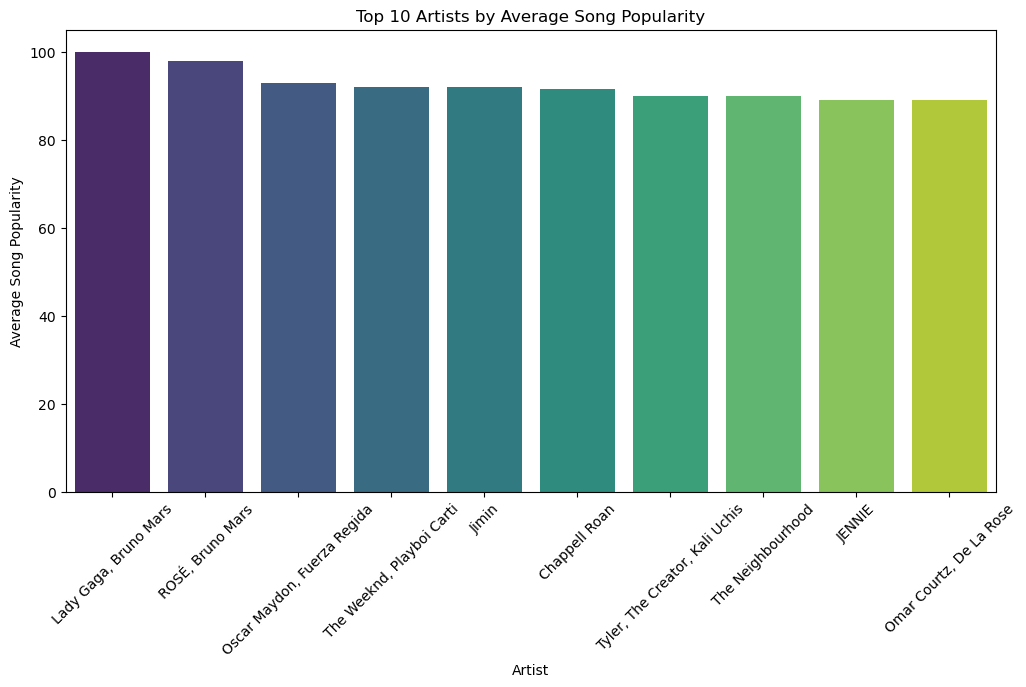

In [33]:
### - How does an artist's popularity affect the performance of their songs?
# Group by artist and calculate the average popularity of their songs
artist_performance = df.groupby('track_artist')['track_popularity'].mean().sort_values(ascending=False)

# Display the top 10 artists with the highest average song popularity
print("Top 10 Artists by Average Song Popularity:")
print(artist_performance.head(10))

# Visualize the relationship between artist popularity and song performance
plt.figure(figsize=(12, 6))
sns.barplot(x=artist_performance.head(10).index, y=artist_performance.head(10).values, palette='viridis')
plt.title('Top 10 Artists by Average Song Popularity')
plt.xlabel('Artist')
plt.ylabel('Average Song Popularity')
plt.xticks(rotation=45)
plt.show()

### - Are there genre or style trends that are rising or declining?

# Genre Trends Analysis Step

## Code Breakdown

### 1. Data Preparation
- Filters data after 1900 to remove historical anomalies
- Groups songs by release year and genre
- Counts number of songs in each category
- Uses unstack to create a wide format table

### 2. Visualization Setup
- Creates line plot with markers
- Each line represents a different genre
- Shows trend over time

### 3. Plot Formatting
- [Details about plot formatting would be specified in the code, e.g., labels, colors, etc.]

## Data Interpretation

### Time Series Analysis
**Historical Trends**:
- Shows how genres have evolved over time
- Identifies rising and declining genres
- Reveals peak periods for different genres

**Genre Popularity**:
- Compares relative popularity of different genres
- Shows which genres dominate in different eras
- Indicates market saturation points

**Industry Patterns**:
- Reveals genre lifecycle patterns
- Shows genre emergence and decline periods
- Indicates industry trend shifts

## Business Insights
- Helps predict future genre trends
- Guides genre selection for new artists
- Informs timing of genre-specific releases
- Assists in long-term career planning

This visualization helps artists and producers understand genre evolution and make strategic decisions about their musical direction.


<Figure size 1200x600 with 0 Axes>

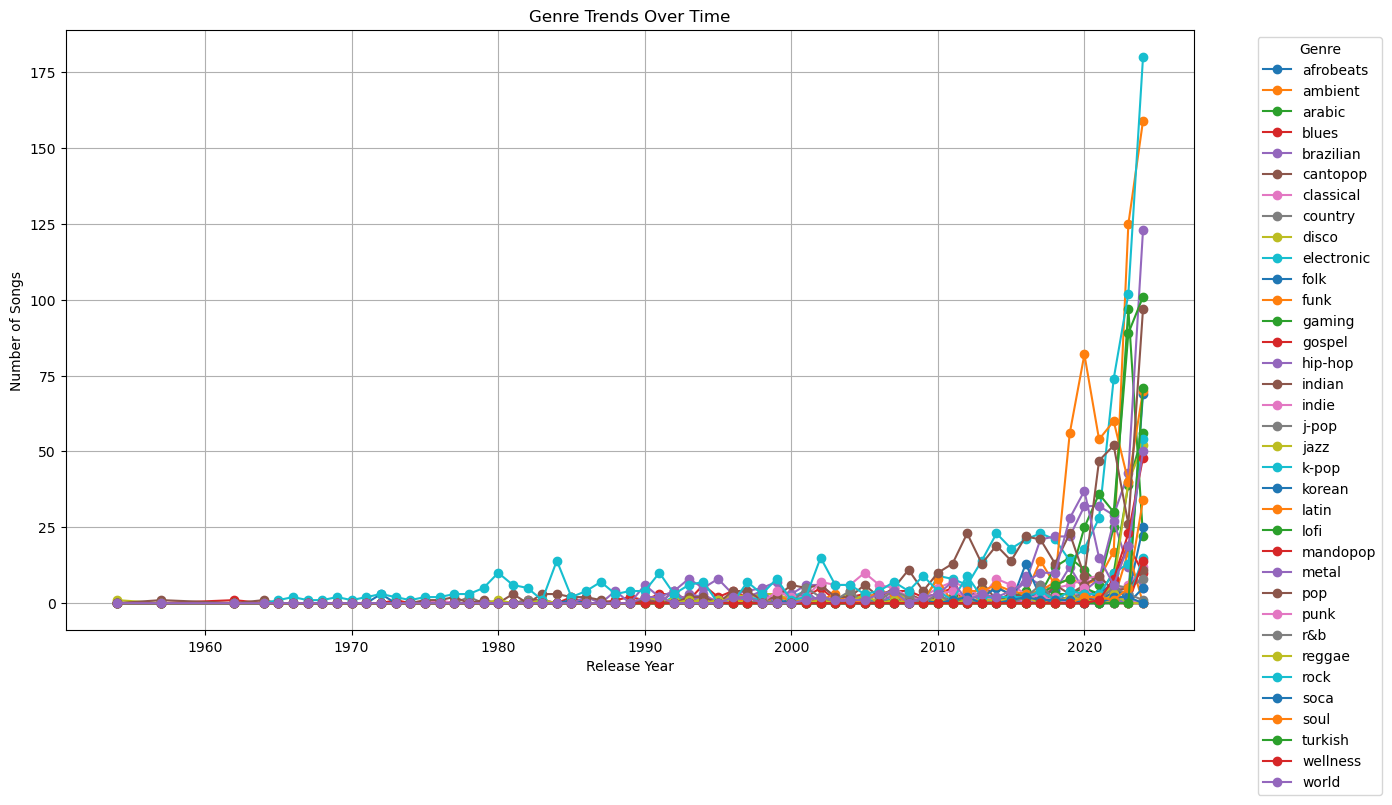

In [34]:
### - Are there genre or style trends that are rising or declining?
# Group by release_year and playlist_genre to count the number of songs
genre_trends = df[df['release_year'] > 1900].groupby(['release_year', 'playlist_genre']).size().unstack(fill_value=0)

# Plot the trends over time
plt.figure(figsize=(12, 6))
genre_trends.plot(kind='line', figsize=(14, 8), marker='o')
plt.title('Genre Trends Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Songs')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### - How does the length of an artist's career influence their popularity?

# Artist Career Analysis Step

## Code Breakdown

### 1. Data Preparation
- Filters data after 1900 to remove historical anomalies
- Calculates earliest and latest release years per artist
- Computes career length (in years)

### 2. Popularity Calculation
- Calculates average popularity score for each artist

### 3. Data Merging
- Combines career length and popularity metrics
- Creates unified dataset for analysis

## Visualization Interpretation

### Scatter Plot Analysis
- **X-axis**: Career length in years
- **Y-axis**: Average popularity score
- **Alpha**: 0.6 for better visibility of overlapping points

### Key Findings
**Career Impact**:
- Shows relationship between career duration and popularity
- Reveals if longer careers correlate with higher popularity

**Distribution Patterns**:
- Indicates clustering of artists by career length
- Shows popularity spread across different career durations

**Outliers**:
- Identifies exceptionally successful artists
- Shows unusual career length/popularity combinations

## Business Insights
- Helps understand career longevity's impact on success
- Provides benchmarks for artist development
- Guides long-term career planning
- Indicates optimal career development patterns

This analysis helps artists and managers understand how career length relates to sustained popularity in the music industry.


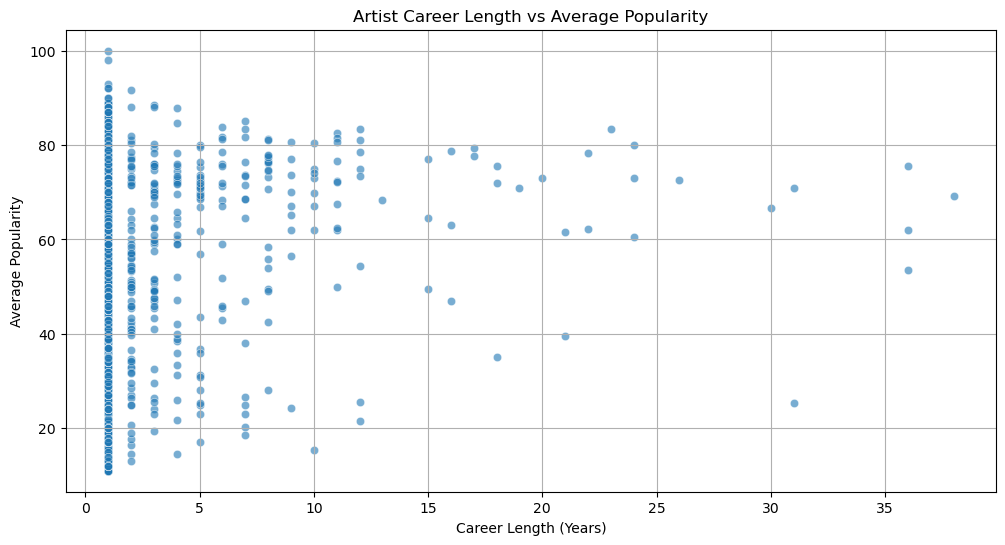

In [35]:
### - How does the length of an artist's career influence their popularity?
# Calculate the career length for each artist
artist_career = df[df['release_year'] > 1900].groupby('track_artist')['release_year'].agg(['min', 'max'])
artist_career['career_length'] = artist_career['max'] - artist_career['min'] + 1

# Calculate the average popularity for each artist
artist_popularity = df[df['release_year'] > 1900].groupby('track_artist')['track_popularity'].mean()

# Merge career length and popularity into a single DataFrame
artist_analysis = artist_career.merge(artist_popularity, left_index=True, right_index=True)
artist_analysis.rename(columns={'track_popularity': 'average_popularity'}, inplace=True)

# Visualize the relationship between career length and average popularity
plt.figure(figsize=(12, 6))
sns.scatterplot(data=artist_analysis, x='career_length', y='average_popularity', alpha=0.6)
plt.title("Artist Career Length vs Average Popularity")
plt.xlabel("Career Length (Years)")
plt.ylabel("Average Popularity")
plt.grid(True)
plt.show()

### - How do the musical characteristics that lead to popularity vary across different genres?

# Musical Characteristics Analysis by Genre

## Code Breakdown

### 1. Data Preparation
- Sets popularity threshold at 75
- Filters dataset to include only popular songs

### 2. Feature Selection
- Uses scaled versions of key musical features
- Groups data by genre and calculates mean values

### 3. Visualization
- Creates bar plot showing feature distributions across genres
- Uses viridis colormap for clear distinction
- Includes proper labeling and formatting

## Data Interpretation

### Key Features Analysis
**Energy & Danceability**:
- Shows how energetic/danceable songs are across genres
- Reveals genre-specific patterns

**Valence & Tempo**:
- Indicates emotional tone and speed preferences
- Highlights genre-specific musical characteristics

**Loudness & Acousticness**:
- Shows production style preferences
- Reveals genre-specific sound characteristics

## Business Insights
- Helps artists understand genre-specific characteristics
- Guides production choices for specific genres
- Shows what makes songs popular in different genres
- Assists in genre-appropriate song creation

This analysis helps artists and producers understand the musical characteristics that contribute to popularity within specific genres.

Average Musical Characteristics by Genre for Popular Songs:
                scaled_energy  scaled_danceability  scaled_valence  \
playlist_genre                                                       
afrobeats            0.752789             0.721769        0.807116   
ambient              0.414661             0.455766        0.281330   
arabic               0.638760             0.752744        0.340308   
blues                0.724894             0.718373        0.622023   
brazilian            0.647724             0.777198        0.731565   
electronic           0.755044             0.671707        0.477265   
folk                 0.392162             0.528765        0.433100   
gaming               0.690281             0.711749        0.500051   
hip-hop              0.626898             0.726667        0.386594   
indie                0.900280             0.598413        0.744099   
j-pop                0.809581             0.688077        0.763422   
k-pop                0.782521 

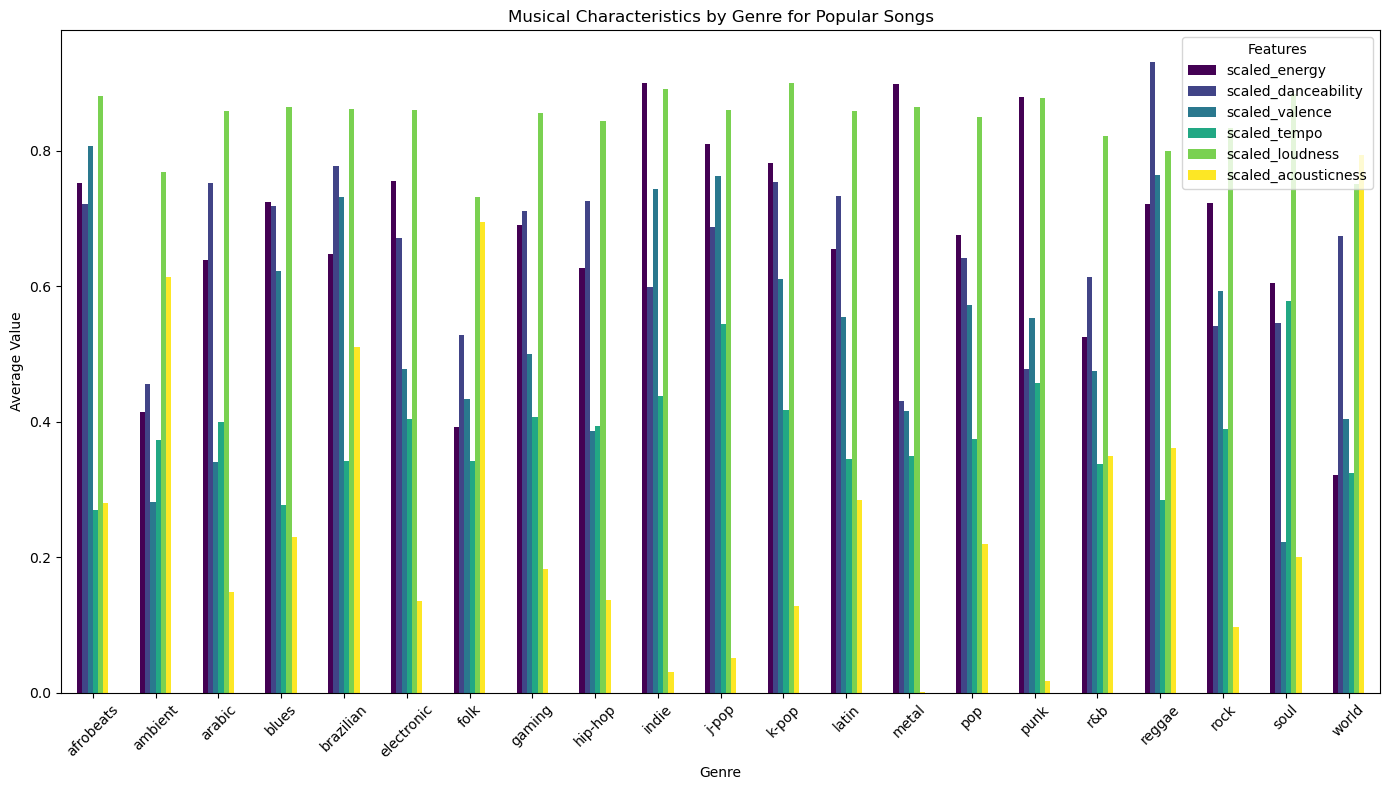

In [36]:
### - How do the musical characteristics that lead to popularity vary across different genres?
# Define a threshold for popularity
popularity_threshold = 75

# Check if the 'popularity' column exists
if 'track_popularity' not in df.columns:
	raise ValueError("The 'popularity' column does not exist in the DataFrame.")

# Filter popular songs
popular_songs = df[df['track_popularity'] > popularity_threshold]

# Check if there are any popular songs
if popular_songs.empty:
	print(f"No songs found with popularity greater than {popularity_threshold}.")
else:
	# Group by genre and calculate average values for key musical features
	features = ['scaled_energy', 'scaled_danceability', 'scaled_valence', 'scaled_tempo', 'scaled_loudness', 'scaled_acousticness']
	genre_characteristics = popular_songs.groupby('playlist_genre')[features].mean()

	# Display the results
	print("Average Musical Characteristics by Genre for Popular Songs:")
	print(genre_characteristics)

	# Visualize the characteristics
	genre_characteristics.plot(kind='bar', figsize=(14, 8), colormap='viridis')
	plt.title('Musical Characteristics by Genre for Popular Songs')
	plt.xlabel('Genre')
	plt.ylabel('Average Value')
	plt.xticks(rotation=45)
	plt.legend(title='Features')
	plt.tight_layout()
	plt.show()

### - How does the subgenre affect the songs popularity?

# Subgenre Popularity Analysis

## Code Breakdown

### 1. Data Aggregation
- Groups songs by subgenre
- Calculates mean popularity for each subgenre
- Sorts results in descending order

### 2. Top Subgenres Display
- Shows top 10 subgenres with highest average popularity
- Provides quantitative measure of subgenre success

### 3. Visualization
- Creates bar plot of top 10 subgenres
- Uses viridis color palette for clear distinction
- Sets appropriate figure size and labels

## Visualization Interpretation

### Key Findings
**Popularity Distribution**:
- Shows clear hierarchy of subgenre popularity
- Reveals which subgenres tend to have higher popularity scores
- Identifies most successful musical niches

**Performance Patterns**:
- Indicates which subgenres consistently perform well
- Shows relative popularity gaps between subgenres
- Helps identify trending musical styles

**Market Insights**:
- Reveals most commercially successful subgenres
- Shows potential opportunities for artists
- Indicates market preferences

## Business Insights
- Helps artists choose profitable subgenres
- Guides marketing strategies for different styles
- Indicates potential success rates in different subgenres
- Assists in playlist and album planning

This analysis helps artists and producers understand which subgenres tend to be more popular, informing their creative and business decisions.


Top Subgenres by Average Popularity:
playlist_subgenre
global         87.680000
mainstream     86.787234
soft           78.551020
throwback      76.733333
80s            73.288889
melodic        72.878788
techno         72.739130
pop punk       70.933333
90s            68.418605
alternative    68.175439
Name: track_popularity, dtype: float64


C:\Users\junio\AppData\Local\Temp\ipykernel_32956\4117437841.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subgenre_popularity.index[:10], y=subgenre_popularity.values[:10], palette='viridis')


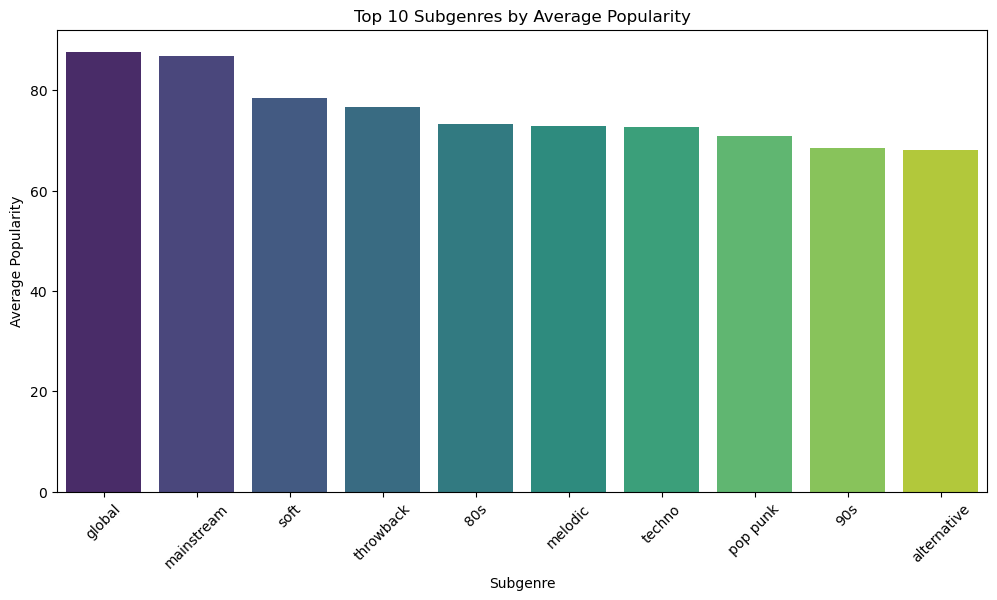

In [37]:
### - How does the subgenre affect the songs popularity?
# Group by subgenre and calculate the average popularity
subgenre_popularity = df.groupby('playlist_subgenre')['track_popularity'].mean().sort_values(ascending=False)

# Display the top subgenres by average popularity
print("Top Subgenres by Average Popularity:")
print(subgenre_popularity.head(10))

# Visualize the popularity of subgenres
plt.figure(figsize=(12, 6))
sns.barplot(x=subgenre_popularity.index[:10], y=subgenre_popularity.values[:10], palette='viridis')
plt.title('Top 10 Subgenres by Average Popularity')
plt.xlabel('Subgenre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.show()

## Artists and Trends (In-Depth):
### Track_artist, Track_album_name, Track_album_release_date:
- How does the consistency and frequency of album releases affect an artist's popularity?
- How the album release date, affects the song popularity?
### Track_popularity, Popularity:
- How does track popularity compare to the artist's overall popularity?
- Which artists manage to maintain high popularity over time?

### - How does the consistency and frequency of album releases affect an artist's popularity?

# Album Release Analysis

## Code Breakdown & Purpose

### 1. Data Aggregation
- Groups data by artist
- Counts unique albums per artist
- Calculates mean popularity
- Sorts by popularity in descending order

### 2. Visualization
Creates scatter plot with:
- **X-axis**: Number of albums released
- **Y-axis**: Average popularity score
- **Alpha**: 0.6 for better overlapping visibility

## Visualization Interpretation

### 1. Relationship Patterns
- **Weak Correlation**: No strong linear relationship between album count and popularity
- **Spread**: Wide variation in popularity across different release frequencies
- **Clusters**: Most artists have fewer albums but varying popularity levels

### 2. Key Insights
- **Quality vs. Quantity**: More albums doesn't necessarily mean higher popularity
- **Success Patterns**: Some artists achieve high popularity with fewer releases
- **Output Range**: Shows typical album output ranges for successful artists

### 3. Business Implications
- **Release Strategy**: Suggests focus on quality over quantity
- **Career Planning**: Helps set realistic album release expectations
- **Success Metrics**: Shows popularity can be achieved with different release strategies

## Recommendations
- **Focus on Quality**: Prioritize quality over release frequency
- **Strategic Planning**: Carefully plan release timing
- **Balanced Approach**: Find optimal balance between staying relevant and maintaining quality
- **Market Position**: Consider target popularity level when planning releases

This analysis helps artists and managers make informed decisions about album release strategies to optimize popularity.


Top 10 Artists by Average Popularity and Album Release Frequency:
                                total_albums  average_popularity
track_artist                                                    
Lady Gaga, Bruno Mars                      1               100.0
ROSÉ, Bruno Mars                           1                98.0
Oscar Maydon, Fuerza Regida                1                93.0
The Weeknd, Playboi Carti                  1                92.0
Jimin                                      1                92.0
Chappell Roan                              2                91.6
Tyler, The Creator, Kali Uchis             1                90.0
The Neighbourhood                          1                90.0
JENNIE                                     1                89.0
Omar Courtz, De La Rose                    1                89.0


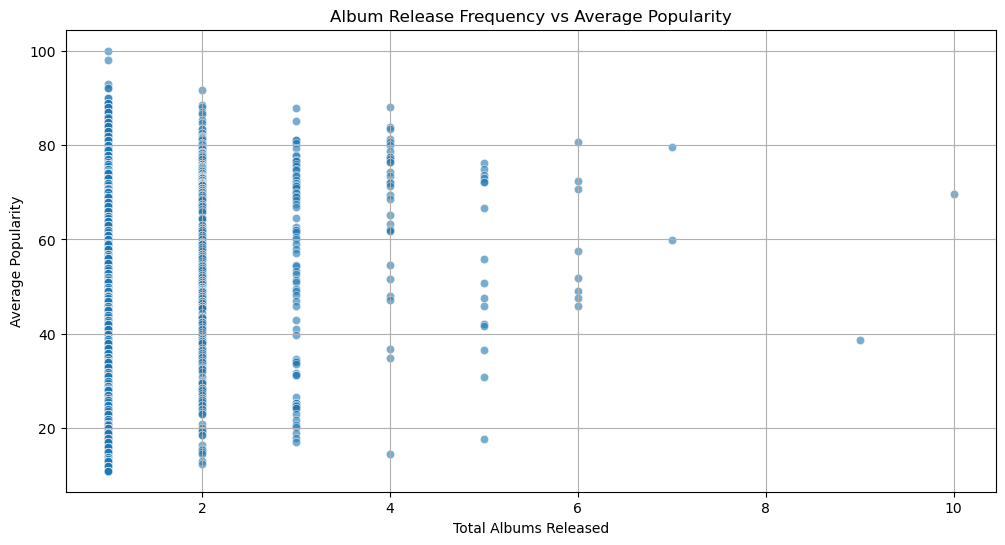

In [38]:
### - How does the consistency and frequency of album releases affect an artist's popularity?
# Group by artist and calculate the number of albums released and their average popularity
artist_album_analysis = df.groupby('track_artist').agg(
    total_albums=('track_album_name', 'nunique'),
    average_popularity=('track_popularity', 'mean')
).sort_values(by='average_popularity', ascending=False)

# Display the top 10 artists with the highest average popularity and their album release frequency
print("Top 10 Artists by Average Popularity and Album Release Frequency:")
print(artist_album_analysis.head(10))

# Visualize the relationship between album release frequency and average popularity
plt.figure(figsize=(12, 6))
sns.scatterplot(data=artist_album_analysis, x='total_albums', y='average_popularity', alpha=0.6)
plt.title("Album Release Frequency vs Average Popularity")
plt.xlabel("Total Albums Released")
plt.ylabel("Average Popularity")
plt.grid(True)
plt.show()

### - How the album release date, affects the song popularity?

# Release Date Analysis

## Code Breakdown

### 1. Year Analysis
- Filters data post-1950
- Creates boxplot showing popularity distribution by year
- Uses viridis color palette for clarity

### 2. Month Analysis
- Shows popularity distribution across months
- Helps identify seasonal patterns
- Visualizes monthly popularity variations

### 3. Day Analysis
- Displays popularity distribution by day of month
- Reveals daily release patterns
- Identifies optimal release days

## Visualization Interpretation

### Year Trends
- Shows evolution of song popularity over time
- Identifies peak years for music popularity
- Reveals historical trends in music success

### Monthly Patterns
- Highlights seasonal variations in popularity
- Shows best months for releases
- Identifies low-performing months

### Daily Distribution
- Shows impact of release day on popularity
- Identifies optimal days for releases
- Reveals patterns in daily popularity

## Business Insights

### Strategic Timing:
- Choose optimal release months
- Select best days for releases
- Consider historical trends

### Planning:
- Schedule releases during peak periods
- Avoid low-performing timeframes
- Align with seasonal patterns

### Market Understanding:
- Track popularity trends over time
- Understand seasonal variations
- Optimize release scheduling

*This analysis helps artists and labels make informed decisions about release timing to maximize song popularity.*

C:\Users\junio\AppData\Local\Temp\ipykernel_32956\1417578013.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df["release_year"] > 1950], x='release_year', y='track_popularity', palette='viridis')


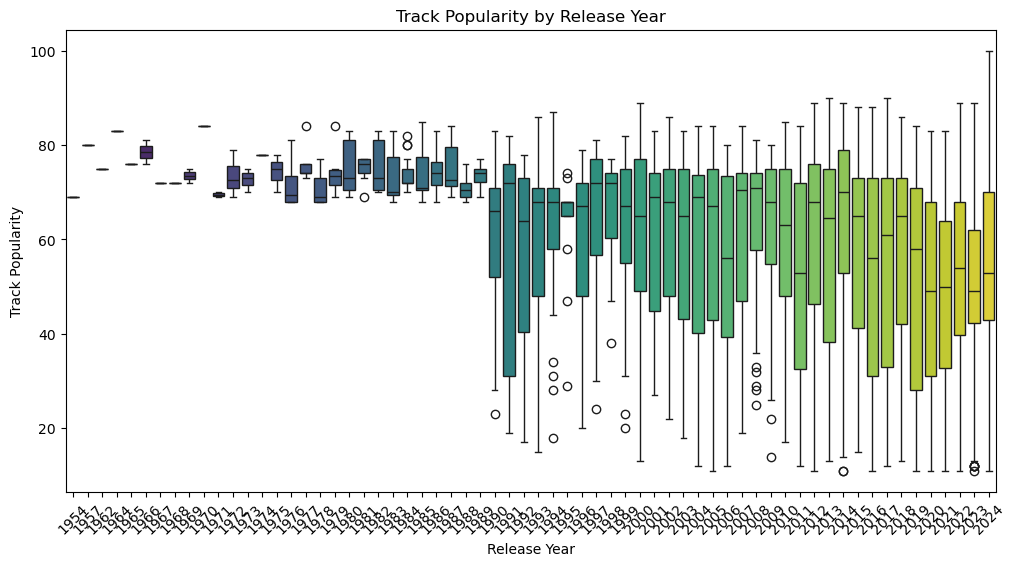

C:\Users\junio\AppData\Local\Temp\ipykernel_32956\1417578013.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='release_month', y='track_popularity', palette='viridis')


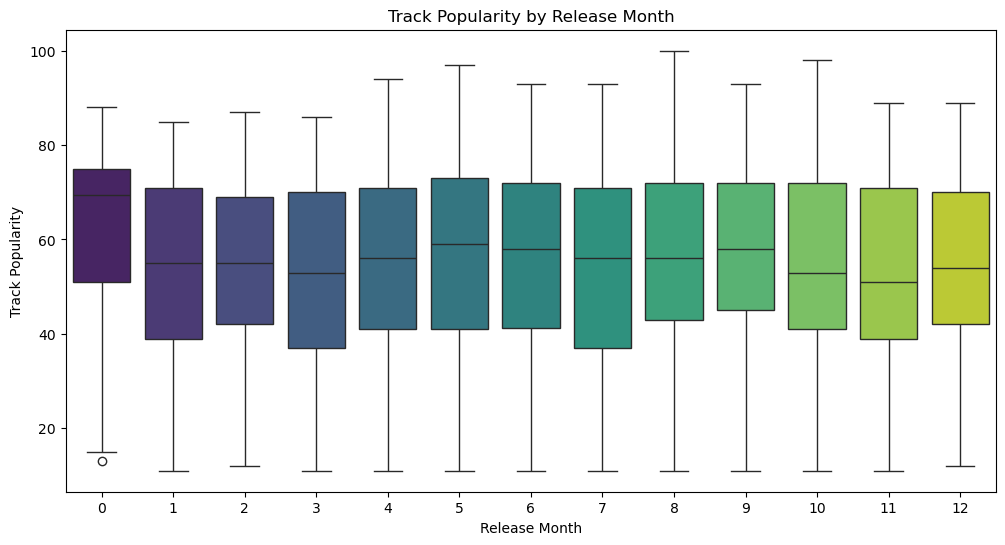

C:\Users\junio\AppData\Local\Temp\ipykernel_32956\1417578013.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='release_day', y='track_popularity', palette='viridis')


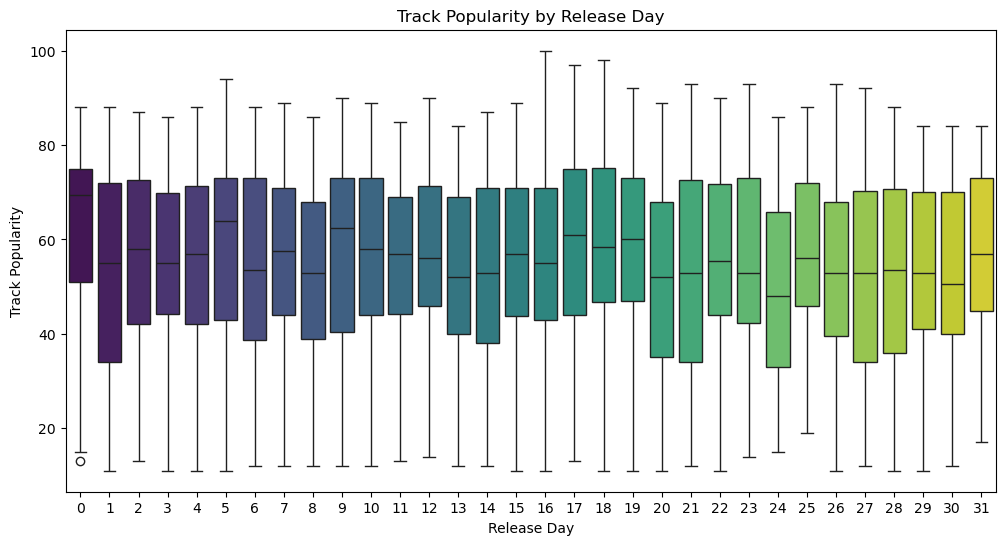

In [39]:
### - How the album release date, affects the song popularity?
# Analyze the relationship between release year and track popularity
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df["release_year"] > 1950], x='release_year', y='track_popularity', palette='viridis')
plt.title('Track Popularity by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Track Popularity')
plt.xticks(rotation=45)
plt.show()

# Analyze the relationship between release month and track popularity
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='release_month', y='track_popularity', palette='viridis')
plt.title('Track Popularity by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Track Popularity')
plt.show()

# Analyze the relationship between release day and track popularity
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='release_day', y='track_popularity', palette='viridis')
plt.title('Track Popularity by Release Day')
plt.xlabel('Release Day')
plt.ylabel('Track Popularity')
plt.show()

## Genre and Subgenre (In-Depth):
### Playlist_genre, Playlist_subgenre
- How do musical characteristics vary between different subgenres?
- Which Genre has the biggest variance in popularity.

### - How do musical characteristics vary between different subgenres?

# Subgenre Musical Characteristics Analysis

## Code Breakdown

### 1. Data Preparation
- Selects key musical features
- Identifies top 10 most popular subgenres
- Uses scaled versions of features for fair comparison

### 2. Data Aggregation
- Filters for top subgenres
- Calculates mean values of features
- Groups data by subgenre

### 3. Visualization
- Creates bar plot comparing features
- Uses viridis color palette
- Includes clear labels and legend

## Visualization Interpretation

### 1. Feature Comparison
- Shows how musical characteristics vary across subgenres
- Reveals distinct patterns for different styles
- Identifies subgenre-specific traits

### 2. Key Insights
- **Energy & Danceability**: Shows variation in intensity and rhythm
- **Valence & Tempo**: Reveals emotional and speed differences
- **Loudness & Acousticness**: Indicates production style preferences

### 3. Business Applications
- Guides production choices for specific subgenres
- Helps artists target specific musical niches
- Informs arrangement and mixing decisions

## Recommendations
- Match musical characteristics to target subgenre
- Consider subgenre-specific production styles
- Align composition with typical feature patterns
- Use data to inform creative decisions

*This analysis helps artists and producers understand the typical characteristics of successful songs in different subgenres.*

Average Musical Characteristics by Subgenre:
                   scaled_energy  scaled_danceability  scaled_valence  \
playlist_subgenre                                                       
80s                     0.775372             0.547440        0.624864   
90s                     0.674213             0.783492        0.638410   
alternative             0.774117             0.483561        0.459868   
global                  0.642713             0.593522        0.532125   
mainstream              0.660657             0.669462        0.576868   
melodic                 0.652508             0.685574        0.366396   
pop punk                0.844825             0.467449        0.531236   
soft                    0.595630             0.574713        0.434200   
techno                  0.788622             0.695992        0.524684   
throwback               0.775432             0.702387        0.678943   

                   scaled_tempo  scaled_loudness  scaled_acousticness  
playli

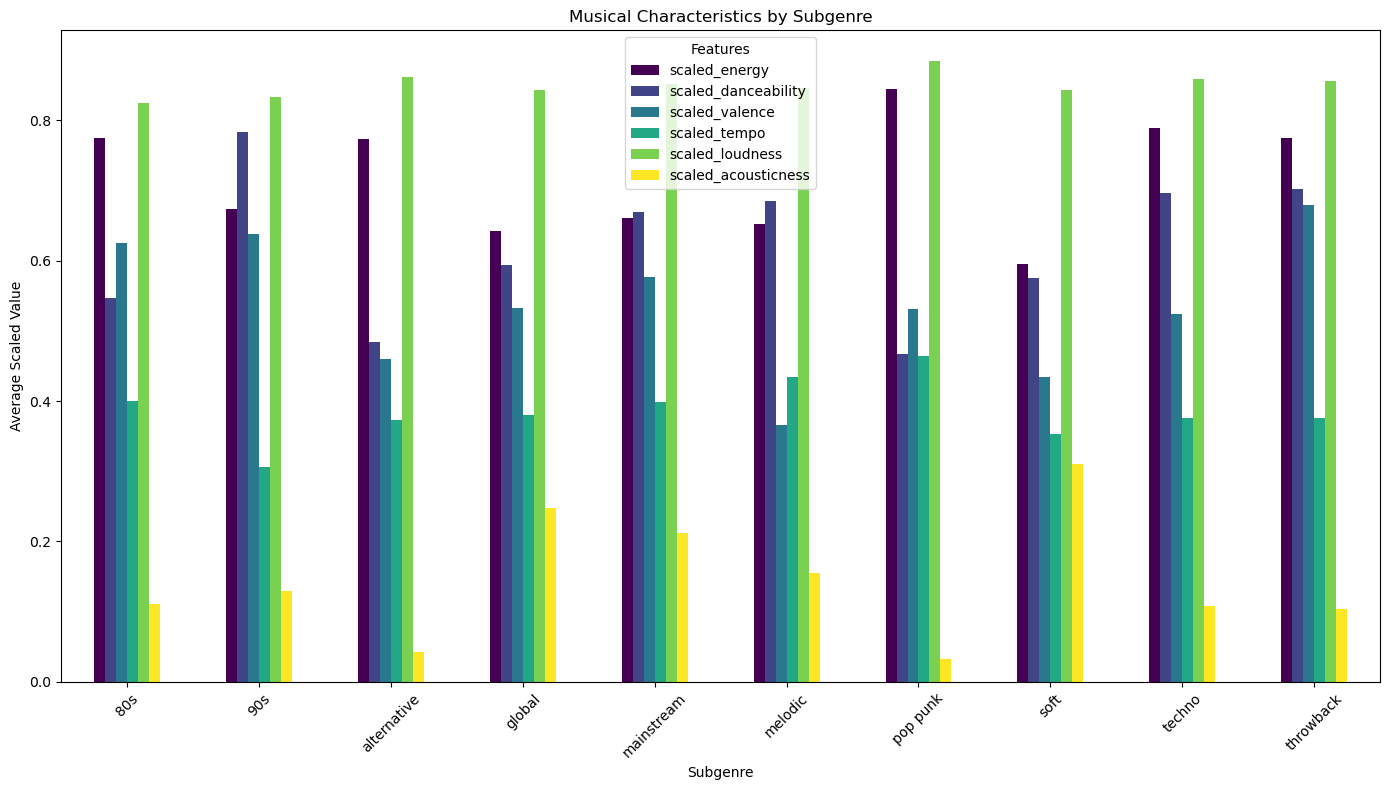

In [40]:
### - How do musical characteristics vary between different subgenres?
# Group by subgenre and calculate average values for selected musical features
characteristics = ['scaled_energy', 'scaled_danceability', 'scaled_valence', 'scaled_tempo', 'scaled_loudness', 'scaled_acousticness']

# Filter top 10 subgenres by average popularity
top10_subgenres = subgenre_popularity.head(10).index
subgenre_characteristics = df[df['playlist_subgenre'].isin(top10_subgenres)].groupby('playlist_subgenre')[characteristics].mean()

print("Average Musical Characteristics by Subgenre:")
print(subgenre_characteristics)

# Visualize the characteristics by subgenre
subgenre_characteristics.plot(kind='bar', figsize=(14, 8), colormap='viridis')
plt.title('Musical Characteristics by Subgenre')
plt.xlabel('Subgenre')
plt.ylabel('Average Scaled Value')
plt.xticks(rotation=45)
plt.legend(title='Features')
plt.tight_layout()
plt.show()

### - Which Genre has the biggest variance in popularity.

# Genre Popularity Variance Analysis

## Code Breakdown

### 1. Data Analysis
- Calculates variance of popularity for each genre
- Identifies genre with highest variance
- Records maximum variance value

### 2. Visualization
- Creates sorted bar plot of variances
- Uses viridis color scheme
- Sets appropriate figure size and labels

## Interpretation

### 1. Genre Stability
- Higher variance indicates less predictable popularity
- Lower variance suggests more consistent performance
- Shows which genres have more volatile success rates

### 2. Market Insights

**High Variance Genres:**
- More risky but potential for higher success
- Greater spread between hits and misses
- More unpredictable market response

**Low Variance Genres:**
- More stable popularity levels
- More predictable market performance
- Consistent audience engagement

### 3. Business Applications
- **Risk Assessment:** Helps evaluate genre-specific risks
- **Strategy Planning:** Guides genre selection decisions
- **Market Positioning:** Informs marketing approach
- **Investment Decisions:** Aids in resource allocation

## Recommendations
- Consider risk tolerance when choosing genres
- Balance portfolio across variance levels
- Adjust marketing strategies based on variance
- Plan for volatility in high-variance genres

*This analysis helps artists and producers understand the stability and predictability of success across different musical genres.*

The genre with the biggest variance in popularity is 'pop' with a variance of 616.04.


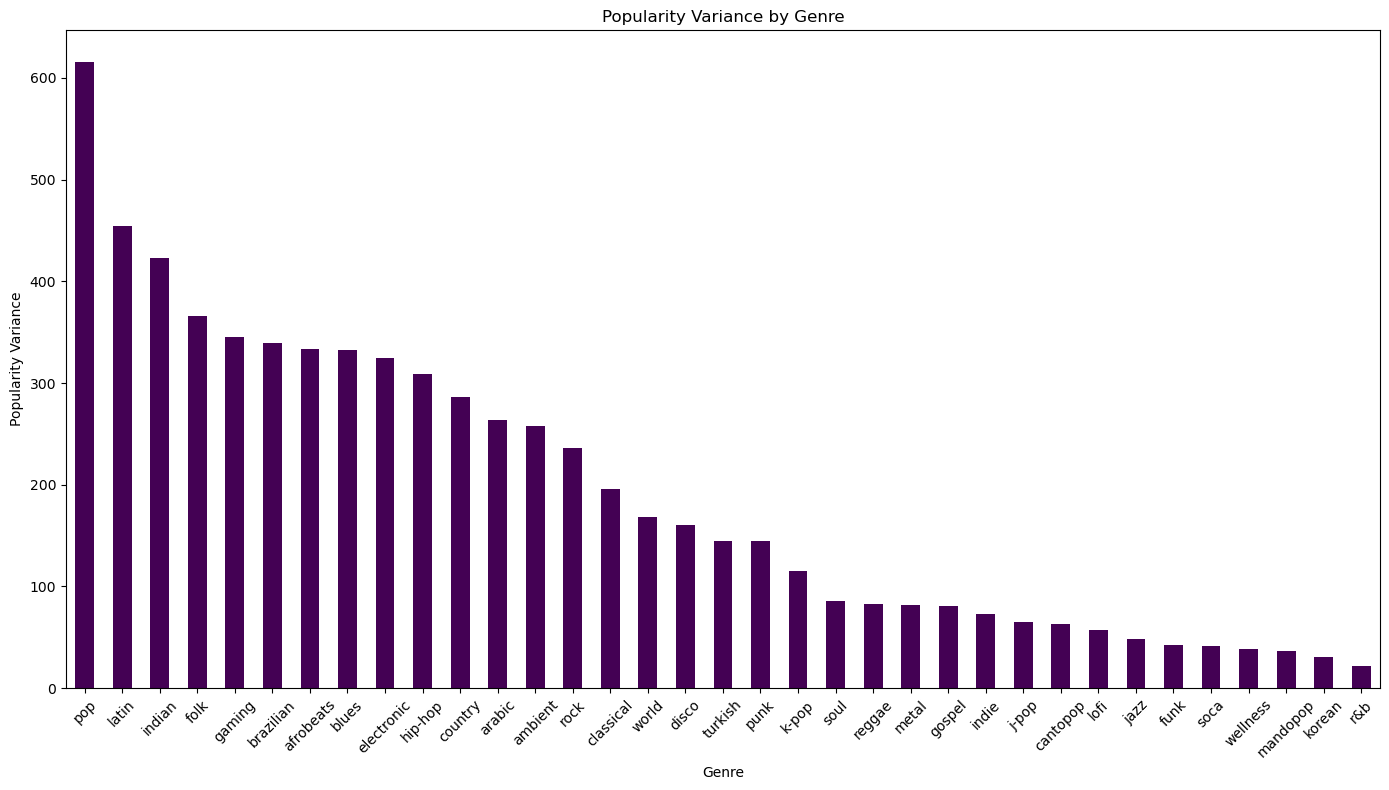

In [41]:
### - Which Genre has the biggest variance in popularity.
# Calculate the variance of popularity for each genre
genre_variance = df.groupby('playlist_genre')['track_popularity'].var()

# Find the genre with the highest variance
max_variance_genre = genre_variance.idxmax()
max_variance_value = genre_variance.max()

print(f"The genre with the biggest variance in popularity is '{max_variance_genre}' with a variance of {max_variance_value:.2f}.")

genre_variance.sort_values(ascending=False).plot(kind='bar', figsize=(14, 8), colormap='viridis')
plt.title('Popularity Variance by Genre')
plt.xlabel('Genre')
plt.ylabel('Popularity Variance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Temporal Analysis:
### Release_year, Release_month, Release_day:
- Are there seasonal trends in song popularity?
- How song popularity change through the years?
- Are there days of the week that have more popular song releases?

### - Are there seasonal trends in song popularity?

# Seasonal Trends Analysis in Song Popularity

## Code Breakdown

### 1. Data Aggregation
- Groups data by release month
- Calculates average popularity for each month
- Creates monthly popularity metric

### 2. Visualization
- Creates bar plot of monthly trends
- Uses viridis color palette
- Sets appropriate figure dimensions

### 3. Formatting
- Converts numeric months to text labels
- Makes visualization more readable
- Maintains chronological order

## Visualization Interpretation

### 1. Seasonal Patterns
- Shows how song popularity varies throughout the year
- Identifies peak months for music releases
- Reveals seasonal trends in listener engagement

### 2. Key Insights
- **Peak Periods:** Identifies months with highest average popularity
- **Low Periods:** Shows months with lower popularity scores
- **Seasonal Variation:** Reveals cyclical patterns in music popularity

### 3. Business Applications
- **Release Timing:** Helps plan optimal release dates
- **Marketing Strategy:** Guides promotional timing
- **Content Planning:** Informs content calendar development
- **Resource Allocation:** Assists in marketing budget distribution

## Recommendations
- Time releases for high-popularity months
- Plan marketing around seasonal peaks
- Prepare content for high-engagement periods
- Consider seasonal factors in release strategy

*This analysis helps artists and labels make data-driven decisions about when to release and promote their music for maximum impact.*

C:\Users\junio\AppData\Local\Temp\ipykernel_32956\1493389616.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_popularity.index, y=monthly_popularity.values, palette='viridis')


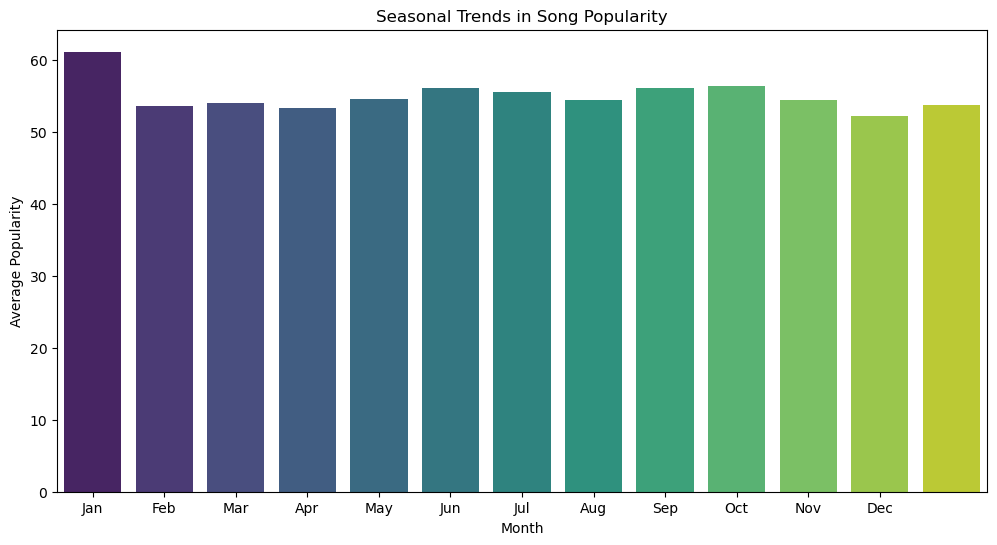

In [42]:
### - Are there seasonal trends in song popularity?
# Group by release_month and calculate the average popularity
monthly_popularity = df.groupby('release_month')['track_popularity'].mean()

# Plot the seasonal trends
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_popularity.index, y=monthly_popularity.values, palette='viridis')
plt.title('Seasonal Trends in Song Popularity')
plt.xlabel('Month')
plt.ylabel('Average Popularity')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

### - How song popularity change through the years?

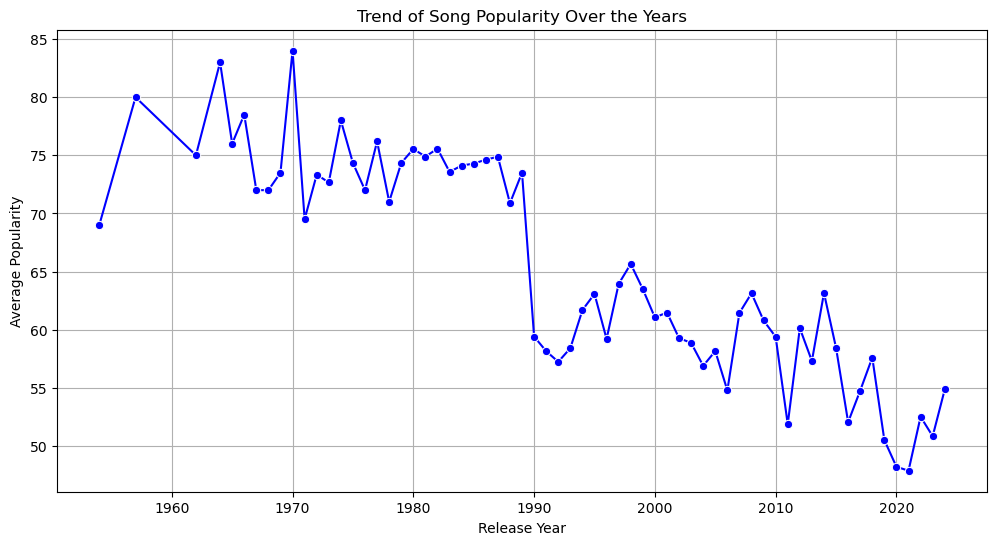

In [43]:
### - How song popularity change through the years?
# Group by release_year and calculate the average popularity
yearly_popularity = df[df['release_year'] > 1900].groupby('release_year')['track_popularity'].mean()

# Plot the trend of song popularity over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_popularity.index, y=yearly_popularity.values, marker='o', color='b')
plt.title('Trend of Song Popularity Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.grid(True)
plt.show()

### - Are there days of the week that have more popular song releases?

C:\Users\junio\AppData\Local\Temp\ipykernel_32956\2526677211.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_of_week_popularity.index, y=day_of_week_popularity.values, palette='viridis')


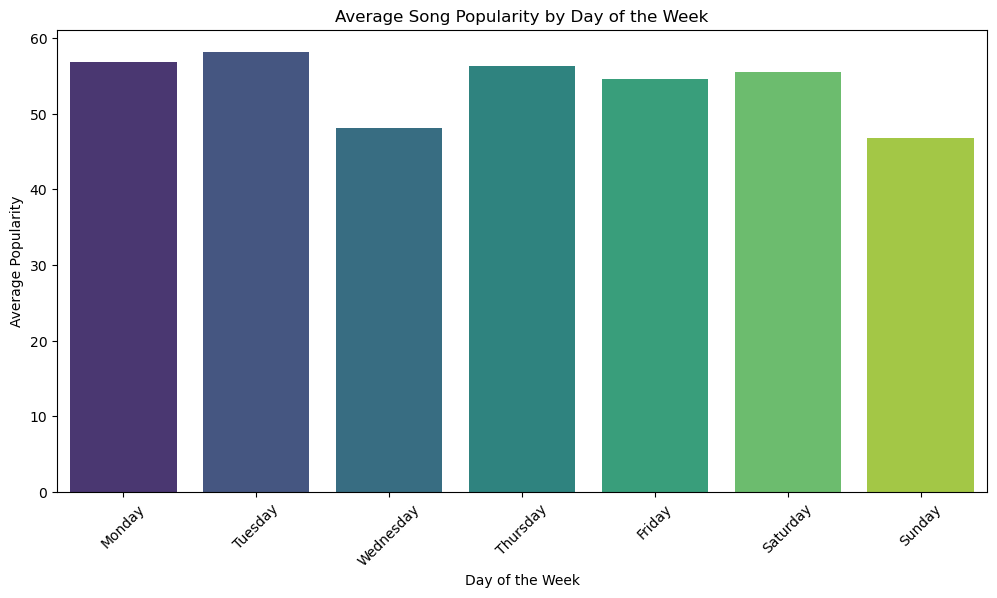

In [44]:
# Ensure the 'track_album_release_date' column is in datetime format
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')

# Extract the day of the week from the release date
df['release_day_of_week'] = df['track_album_release_date'].dt.day_name()

# Group by day of the week and calculate the average popularity
day_of_week_popularity = df.groupby('release_day_of_week')['track_popularity'].mean()

# Sort the days of the week in order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_popularity = day_of_week_popularity.reindex(day_order)

# Plot the average popularity by day of the week
plt.figure(figsize=(12, 6))
sns.barplot(x=day_of_week_popularity.index, y=day_of_week_popularity.values, palette='viridis')
plt.title('Average Song Popularity by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.show()

## Playlists:
### Playlist_name:
- Which playlists tend to have the most popular songs?
- What characteristics do songs in popular playlists share?

### - Which playlists tend to have the most popular songs?

Top 10 Playlists with the Most Popular Songs:
playlist_name
Global Top 50        87.680000
Today's Top Hits     86.787234
Top Gaming Tracks    80.430000
Viva Latino          79.883721
Soft Pop Hits        78.551020
Throwback Party      76.733333
R&B Hits             76.160000
EDM Hits             75.800000
Chill Hop            75.363636
RapCaviar            75.307692
Name: track_popularity, dtype: float64


C:\Users\junio\AppData\Local\Temp\ipykernel_32956\1268844499.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=playlist_popularity.index[:10], y=playlist_popularity.values[:10], palette='viridis')


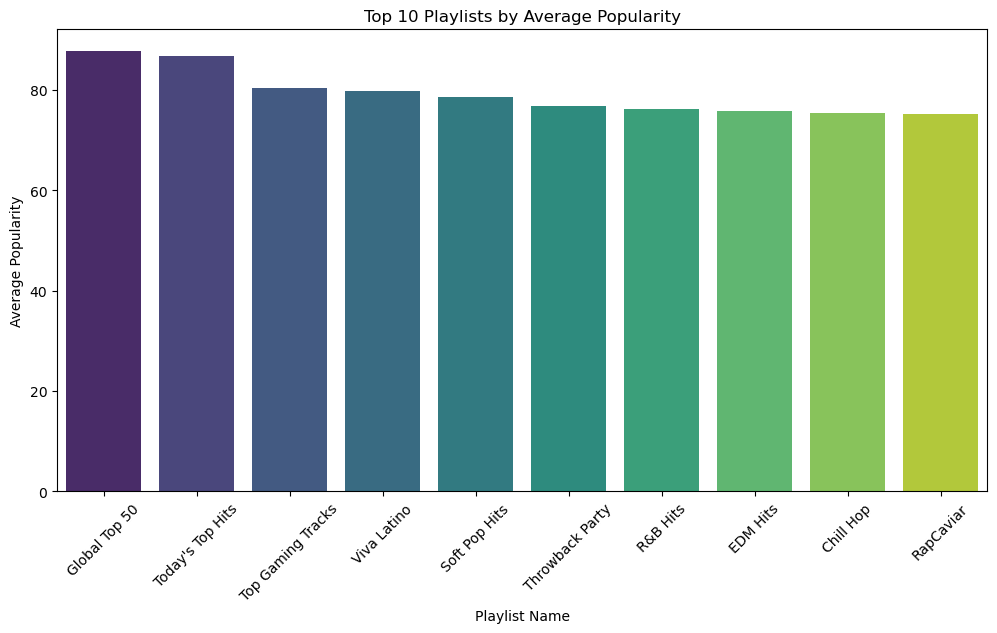

In [45]:
# Group by playlist_name and calculate the average popularity
playlist_popularity = df.groupby('playlist_name')['track_popularity'].mean().sort_values(ascending=False)

# Display the top 10 playlists with the highest average popularity
print("Top 10 Playlists with the Most Popular Songs:")
print(playlist_popularity.head(10))

# Visualize the popularity of playlists
plt.figure(figsize=(12, 6))
sns.barplot(x=playlist_popularity.index[:10], y=playlist_popularity.values[:10], palette='viridis')
plt.title('Top 10 Playlists by Average Popularity')
plt.xlabel('Playlist Name')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.show()

### - What characteristics do songs in popular playlists share?

Average Characteristics of Songs in Popular Playlists:
                   scaled_energy  scaled_danceability  scaled_valence  \
playlist_name                                                           
Chill Hop               0.595746             0.693215        0.519841   
EDM Hits                0.753741             0.655690        0.473066   
Global Top 50           0.642713             0.593522        0.532125   
R&B Hits                0.541170             0.628432        0.508356   
RapCaviar               0.656372             0.750083        0.375981   
Soft Pop Hits           0.595630             0.574713        0.434200   
Throwback Party         0.775432             0.702387        0.678943   
Today's Top Hits        0.660657             0.669462        0.576868   
Top Gaming Tracks       0.706133             0.706836        0.497583   
Viva Latino             0.656569             0.722351        0.609432   

                   scaled_tempo  scaled_loudness  scaled_acousticnes

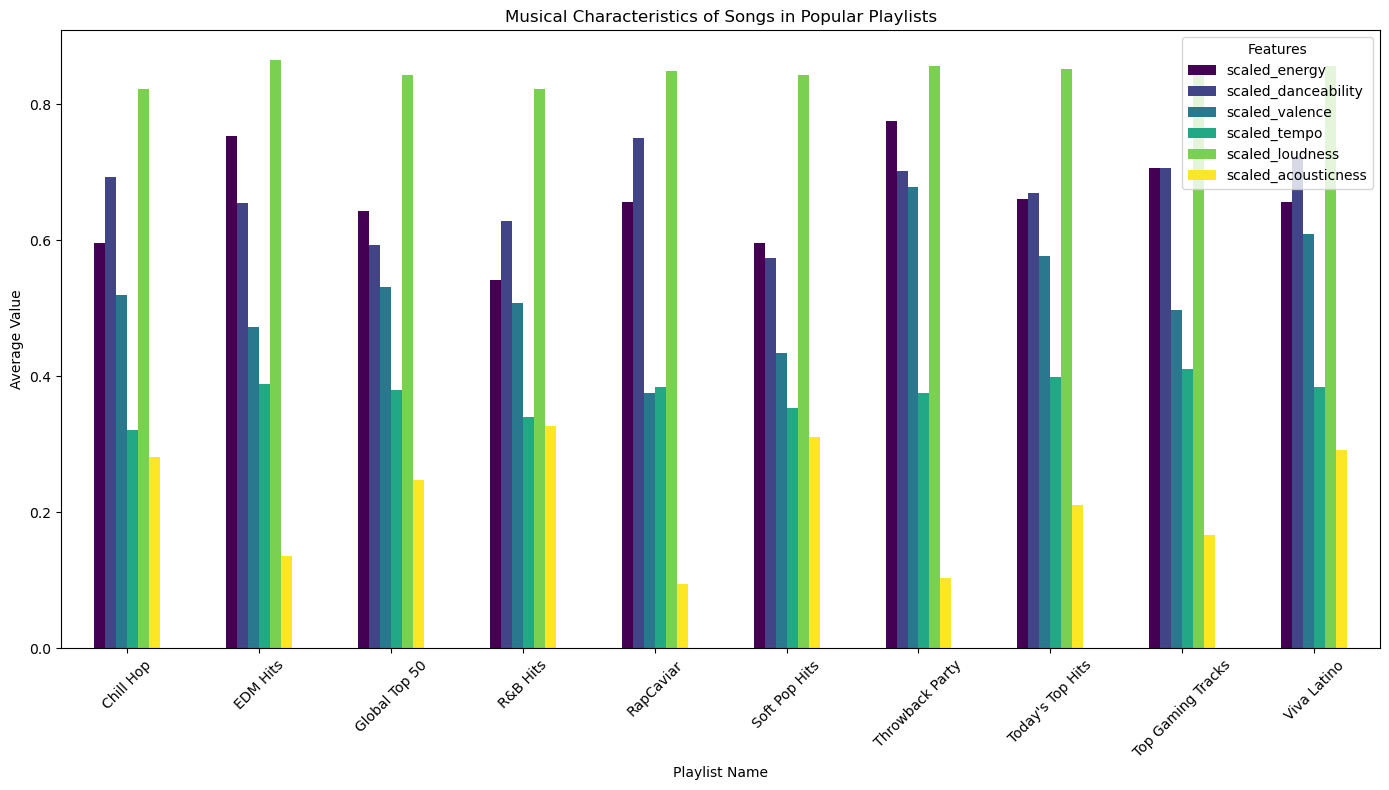

In [46]:
# Filter songs from the top 10 popular playlists
top_playlists = playlist_popularity.head(10).index
popular_playlist_songs = df[df['playlist_name'].isin(top_playlists)]

# Calculate average characteristics for songs in popular playlists
features = ['scaled_energy', 'scaled_danceability', 'scaled_valence', 'scaled_tempo', 'scaled_loudness', 'scaled_acousticness']
playlist_characteristics = popular_playlist_songs.groupby('playlist_name')[features].mean()

# Display the results
print("Average Characteristics of Songs in Popular Playlists:")
print(playlist_characteristics)

# Visualize the characteristics
playlist_characteristics.plot(kind='bar', figsize=(14, 8), colormap='viridis')
plt.title('Musical Characteristics of Songs in Popular Playlists')
plt.xlabel('Playlist Name')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(title='Features')
plt.tight_layout()
plt.show()

--- 

# Data Preprocessing 

--- 

## Normality Analysis 

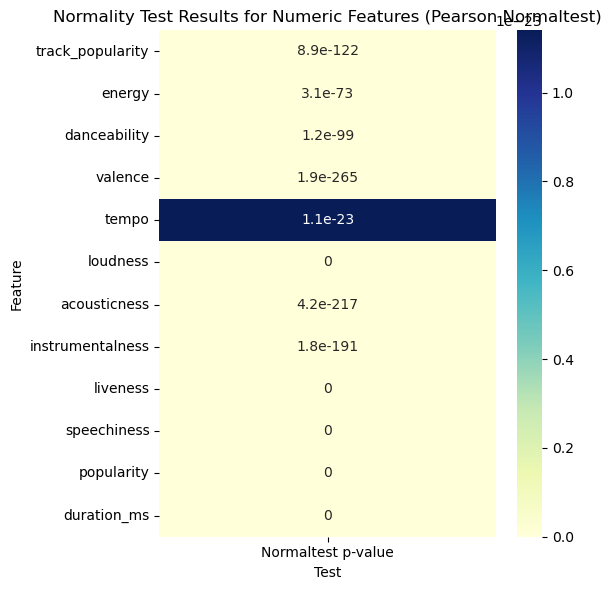

,Normality
track_popularity,Not Normal
energy,Not Normal
danceability,Not Normal
valence,Not Normal
tempo,Not Normal
loudness,Not Normal
acousticness,Not Normal
instrumentalness,Not Normal
liveness,Not Normal
speechiness,Not Normal


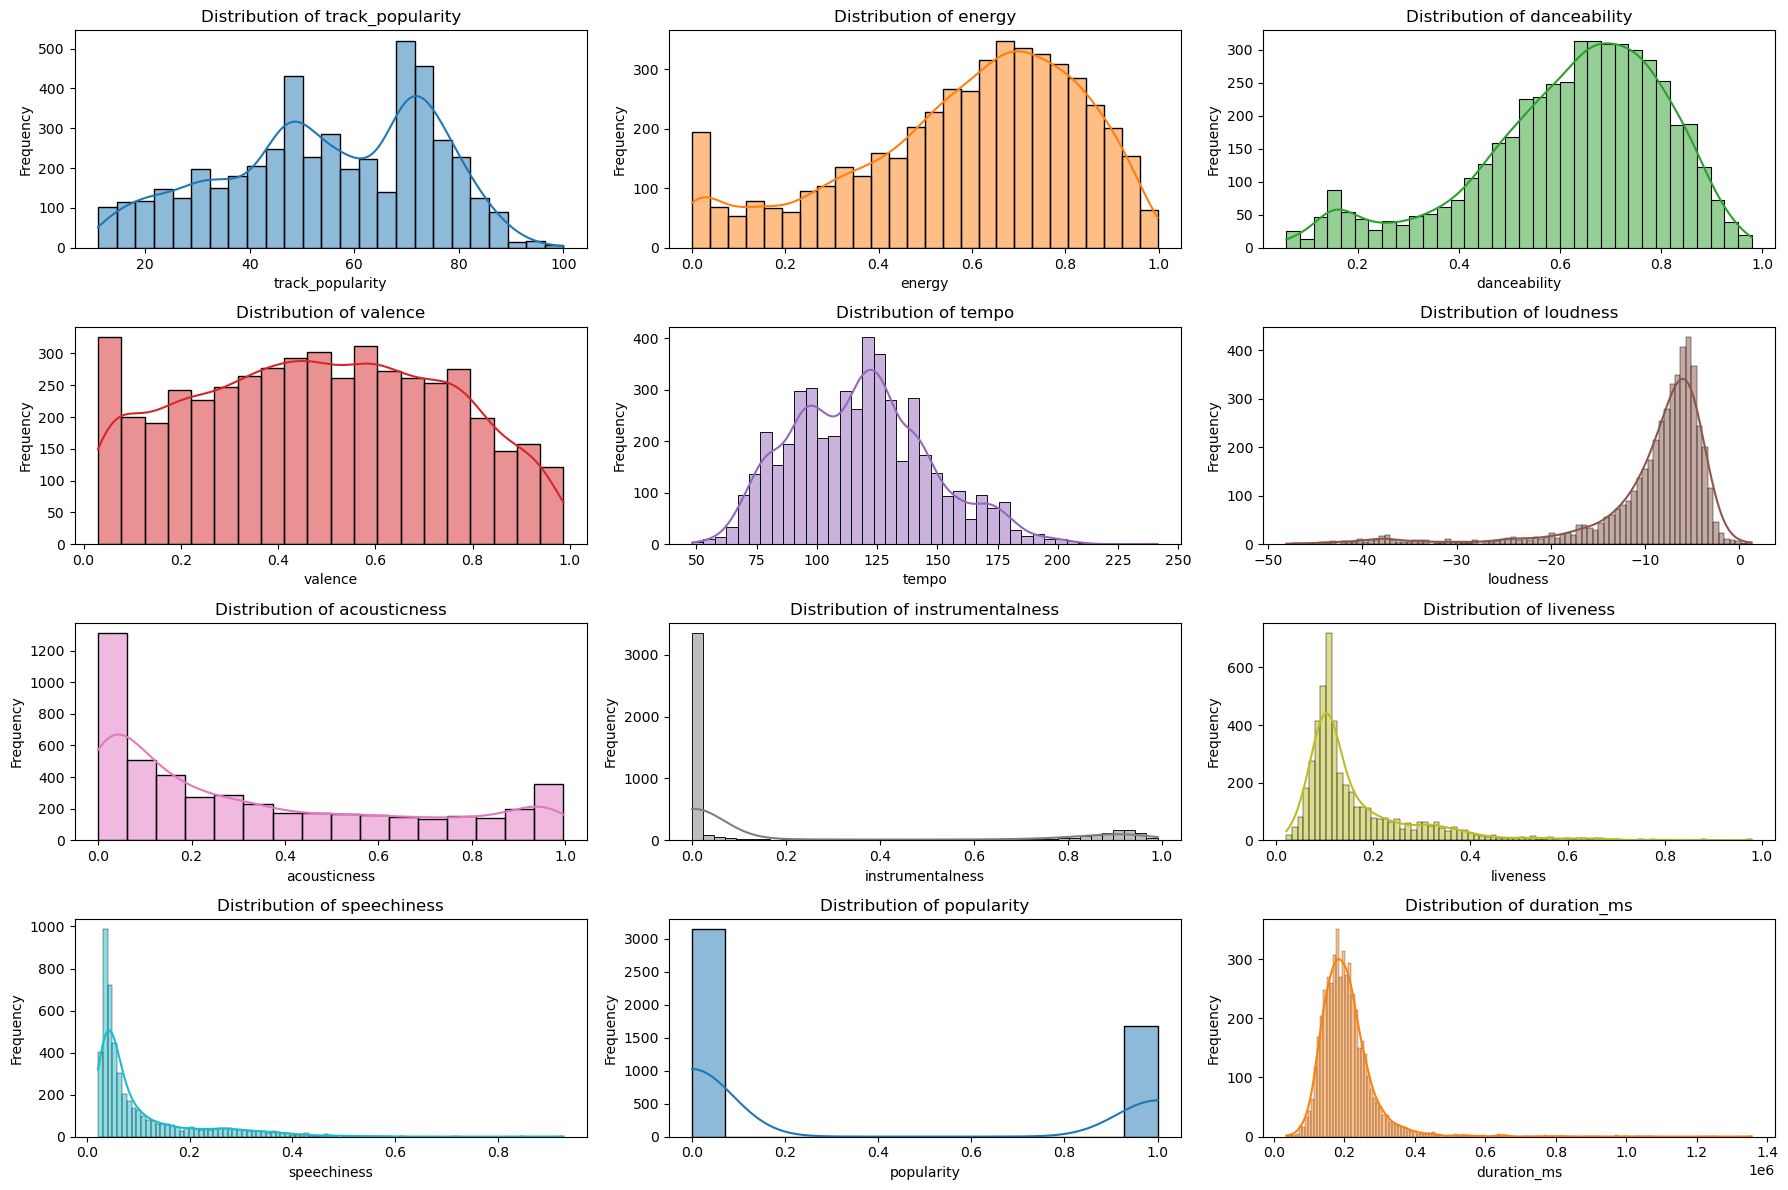

In [47]:
from scipy.stats import normaltest
import seaborn as sns
import itertools
import numpy as np

# Selecting only features relevant for the models used on classification and regression
relevant_columns = ['track_popularity', 'release_year', 'energy', 'danceability', 'valence', 'tempo', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'mode', 'key', 'time_signature', 'popularity', 'duration_ms']

import matplotlib.pyplot as plt

# Select only numeric columns for normality analysis
numeric_cols = df[relevant_columns].select_dtypes(include=['float64', 'int64']).columns

normality_results = {}

for col in numeric_cols:
    data = df[col].dropna()
    # Pearson’s Test (for n >= 20)
    if len(data) >= 20:
        stat, p = normaltest(data)
        normality_results[col] = {'Normaltest p-value': p}

# Convert the results dictionary to a DataFrame for visualization
normality_df = pd.DataFrame(normality_results).T

# Only keep numeric results for the heatmap
numeric_tests = ['Normaltest p-value']
heatmap_data = normality_df[numeric_tests].apply(pd.to_numeric, errors='coerce')

# Add a column indicating if the feature is normal (p > 0.05 for Normaltest)
def is_normal(row):
    normaltest_p = row.get('Normaltest p-value', np.nan)
    if not np.isnan(normaltest_p) and normaltest_p > 0.05:
        return 'Normal'
    return 'Not Normal'

normality_df['Normality'] = normality_df.apply(is_normal, axis=1)

plt.figure(figsize=(6, 0.5 * len(heatmap_data)))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2g')
plt.title('Normality Test Results for Numeric Features (Pearson Normaltest)')
plt.xlabel('Test')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Display normality summary
display(normality_df[['Normality']])

# Visualize distributions for key features in a 3-column grid with different colors

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
n_cols = 3
n_plots = len(numeric_cols)
n_rows = (n_plots + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 3 * n_rows))
axes = axes.flatten()

for idx, (col, color) in enumerate(zip(numeric_cols, itertools.cycle(colors))):
    sns.histplot(df[col].dropna(), kde=True, ax=axes[idx], color=color)
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


--- 

## Class Imbalance

--- 

In [48]:
# Define fixed bins for popularity
popularity_bins = [0, 40, 60, 80, df['track_popularity'].max()]
popularity_labels = ['not_popular', 'almost_popular', 'popular', 'very_popular']

df['popularity_category'] = pd.cut(df['track_popularity'], bins=popularity_bins, labels=popularity_labels, include_lowest=True)
df['popularity_category'].value_counts()

popularity_category
popular           1733
almost_popular    1554
not_popular       1180
very_popular       362
Name: count, dtype: int64

## Outlier Detection

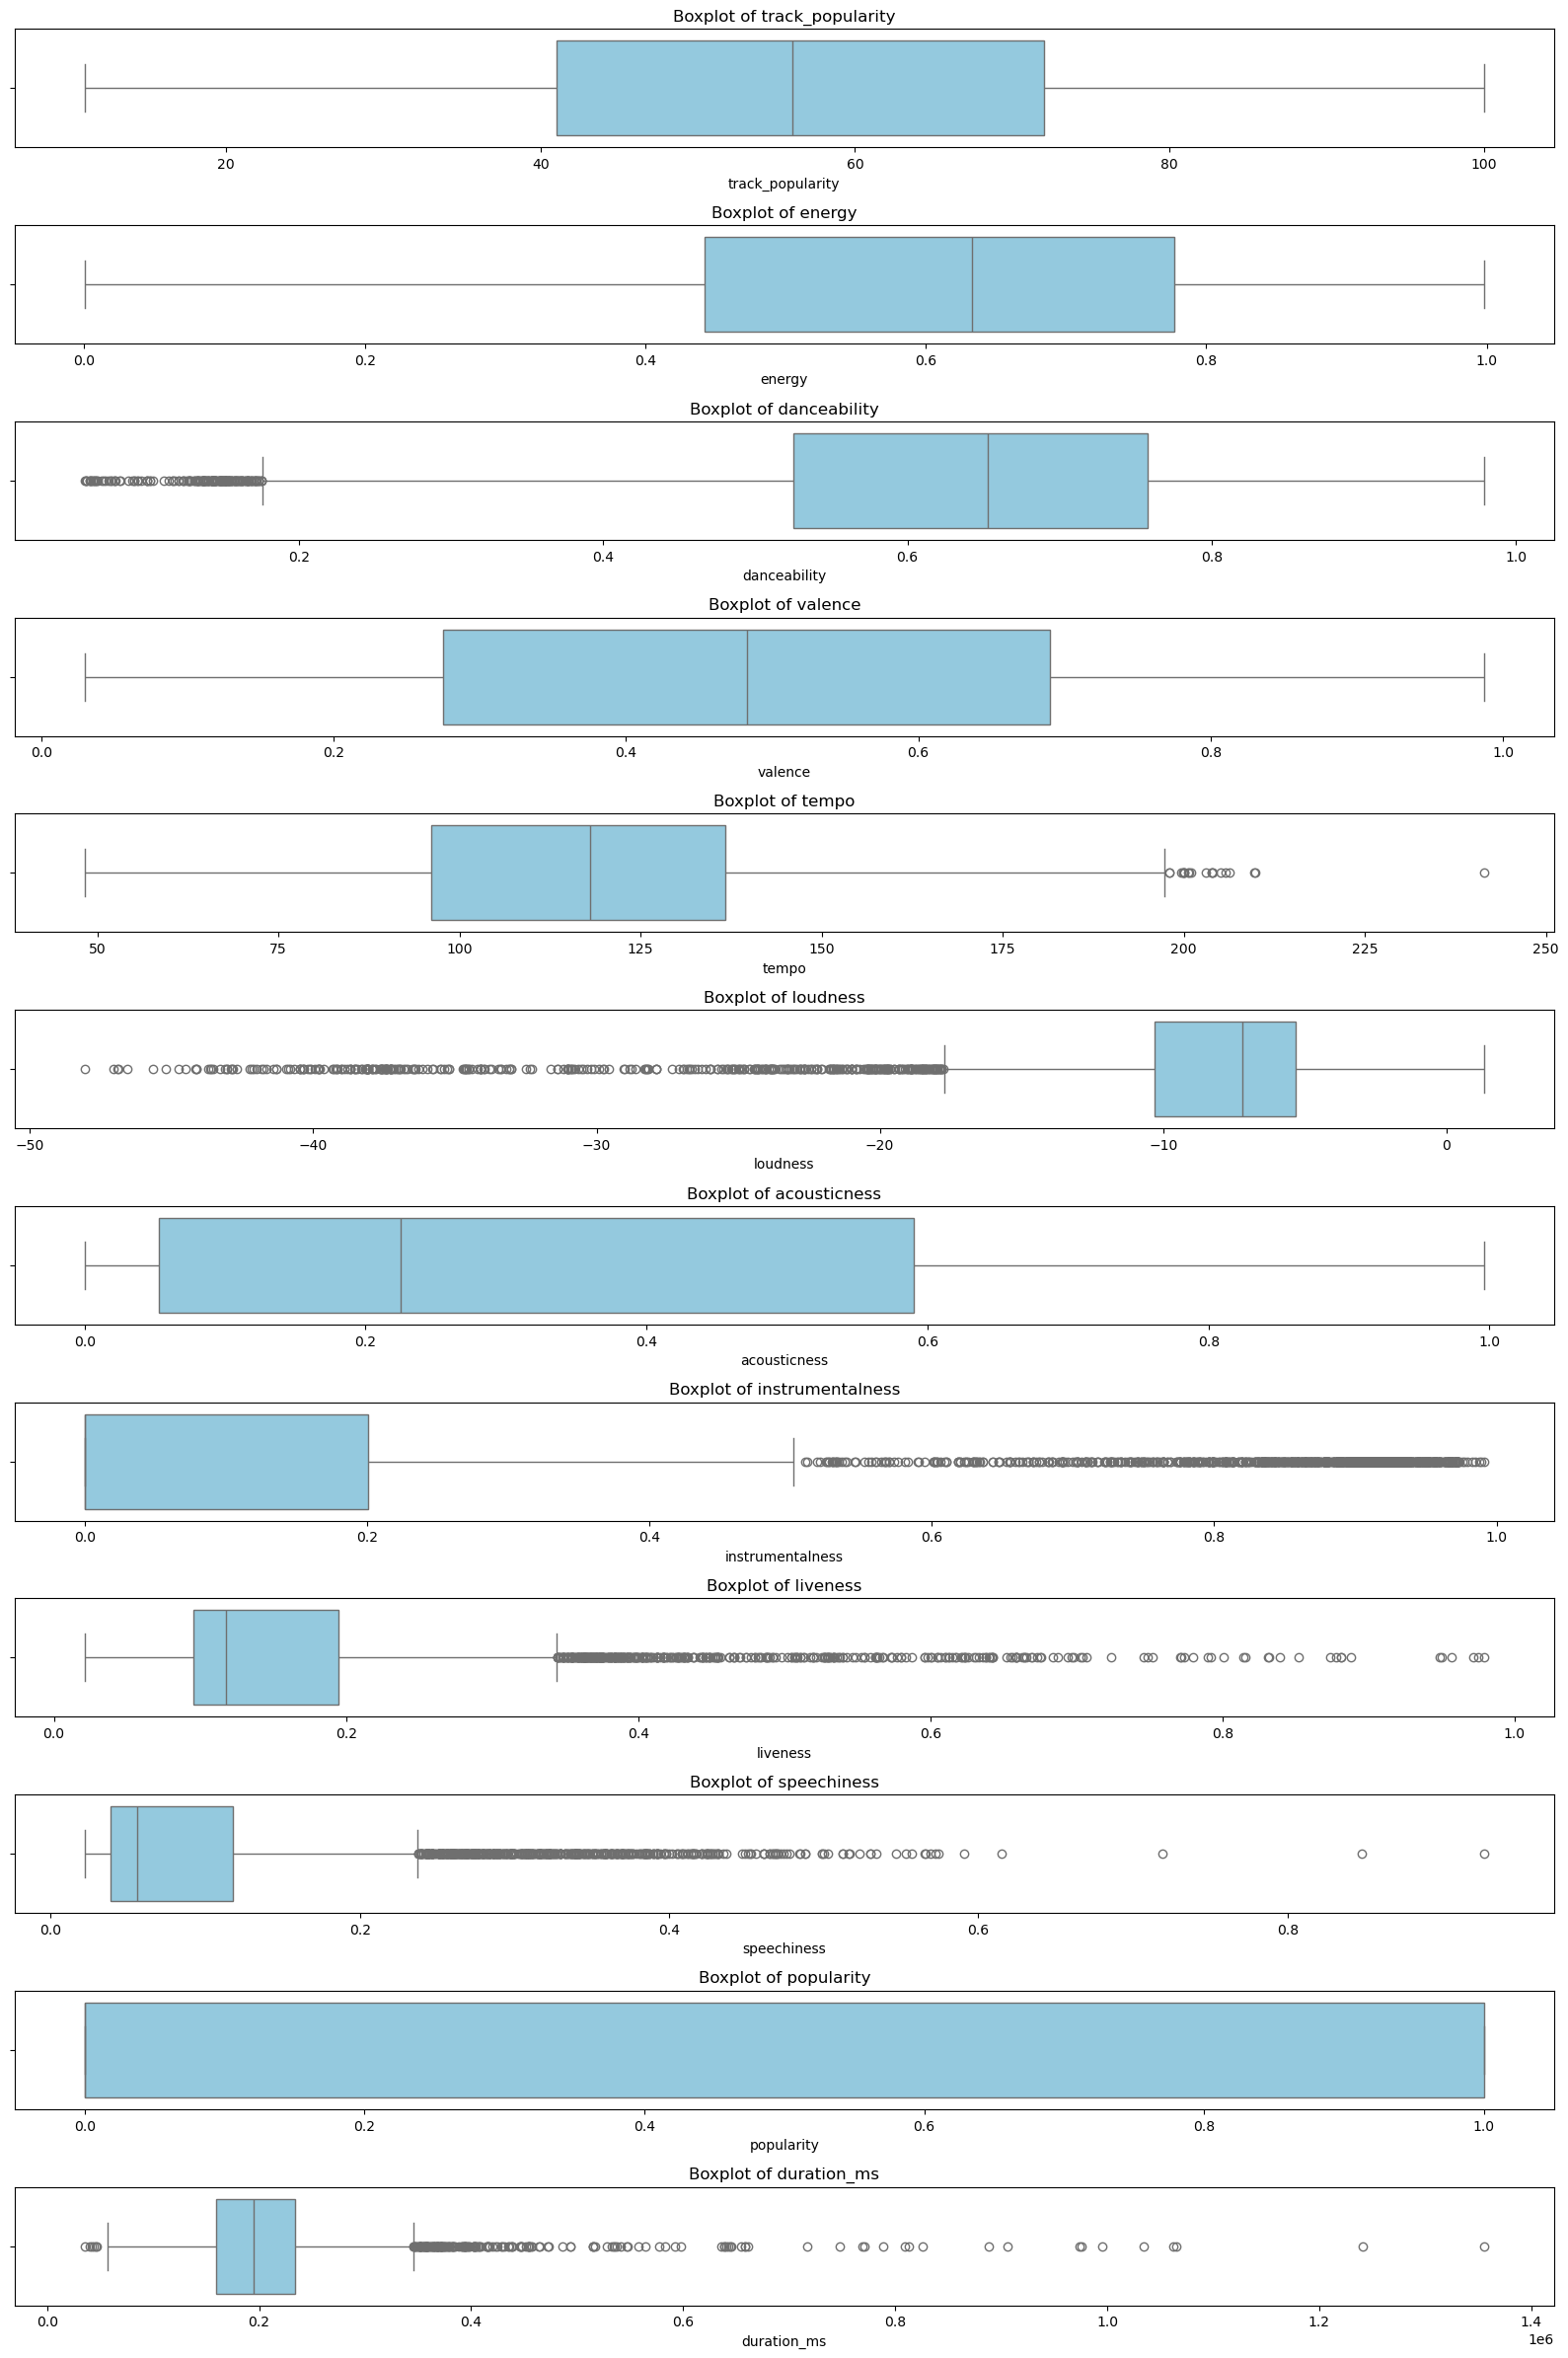

Number of outliers detected per feature (IQR method):
track_popularity: 0
energy: 0
danceability: 191
valence: 0
tempo: 20
loudness: 403
acousticness: 0
instrumentalness: 1038
liveness: 425
speechiness: 590
popularity: 0
duration_ms: 190


In [49]:
# Use only relevant_columns for outlier detection
numeric_cols = df[relevant_columns].select_dtypes(include=['float64', 'int64']).columns

# Visualize boxplots for each relevant numeric feature to detect outliers
plt.figure(figsize=(16, 2 * len(numeric_cols)))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

# Identify outliers using the IQR method for each relevant numeric column
outlier_summary = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outlier_summary[col] = outliers

# Display the number of outliers per feature
print("Number of outliers detected per feature (IQR method):")
for col, count in outlier_summary.items():
    print(f"{col}: {count}")


--- 

## Multicollinearity

Variance Inflation Factor (VIF) for each feature:
             Feature        VIF
0             energy  16.956226
3              tempo  16.119707
1       danceability  14.261991
2            valence   7.392390
10       duration_ms   7.210741
4           loudness   6.516114
5       acousticness   4.160556
7           liveness   2.919033
6   instrumentalness   2.602574
8        speechiness   2.250795
9         popularity   1.737291


C:\Users\junio\AppData\Local\Temp\ipykernel_32956\2422186632.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VIF', y='Feature', data=vif_data.sort_values('VIF', ascending=False), palette='viridis')


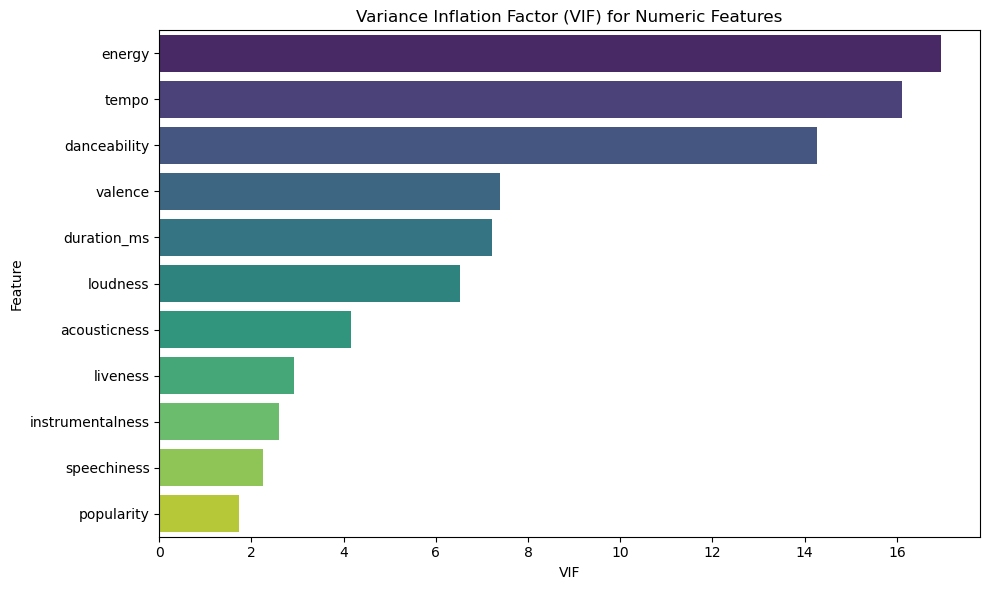

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numeric features for VIF calculation (excluding the target)
numeric_features = [col for col in relevant_columns if col != 'track_popularity' and df[col].dtype in ['float64', 'int64']]
X_vif = df[numeric_features].dropna()

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print("Variance Inflation Factor (VIF) for each feature:")
print(vif_data.sort_values('VIF', ascending=False))

# Visualize VIF values
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='Feature', data=vif_data.sort_values('VIF', ascending=False), palette='viridis')
plt.title('Variance Inflation Factor (VIF) for Numeric Features')
plt.xlabel('VIF')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Removed 'energy' with VIF=16.96
Removed 'danceability' with VIF=13.14
Removed 'tempo' with VIF=10.99
Final features with acceptable VIFs:
            Feature       VIF
0           valence  3.799568
1          loudness  5.734549
2      acousticness  3.679968
3  instrumentalness  2.498242
4          liveness  2.613121
5       speechiness  2.016989
6        popularity  1.647154
7       duration_ms  4.856974


C:\Users\junio\AppData\Local\Temp\ipykernel_32956\3236675773.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VIF', y='Feature', data=vif_df.sort_values('VIF', ascending=False), palette='viridis')


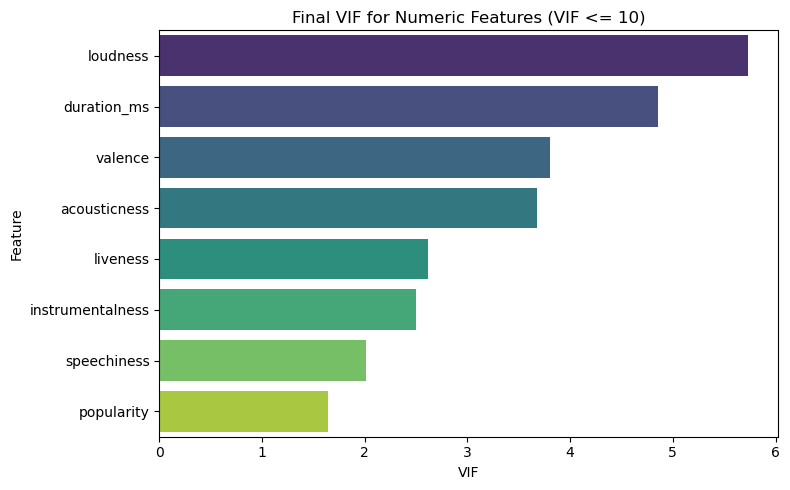

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Iteratively remove features with the highest VIF until all VIFs are below a threshold

# Set VIF threshold
vif_threshold = 10

# Start with the numeric features used previously
features_for_vif = [col for col in relevant_columns if col != 'track_popularity' and df[col].dtype in ['float64', 'int64']]
X_vif_iter = df[features_for_vif].dropna().copy()

vif_history = []

while True:
    vif_df = pd.DataFrame()
    vif_df['Feature'] = X_vif_iter.columns
    vif_df['VIF'] = [variance_inflation_factor(X_vif_iter.values, i) for i in range(X_vif_iter.shape[1])]
    vif_history.append(vif_df.copy())
    max_vif = vif_df['VIF'].max()
    if max_vif <= vif_threshold:
        break
    # Remove the feature with the highest VIF
    drop_feature = vif_df.sort_values('VIF', ascending=False).iloc[0]['Feature']
    X_vif_iter = X_vif_iter.drop(columns=[drop_feature])
    print(f"Removed '{drop_feature}' with VIF={max_vif:.2f}")

print("Final features with acceptable VIFs:")
print(vif_df)

# Optionally, plot the final VIFs
plt.figure(figsize=(8, 5))
sns.barplot(x='VIF', y='Feature', data=vif_df.sort_values('VIF', ascending=False), palette='viridis')
plt.title('Final VIF for Numeric Features (VIF <= 10)')
plt.xlabel('VIF')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

--- 

## Feature Importances & Explainability tools – SHAP, LIME, RF Feature Importances

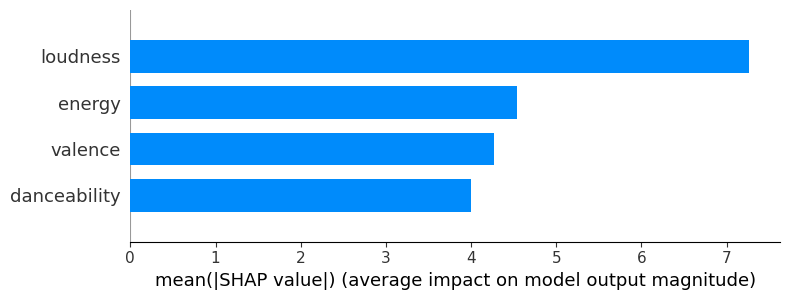

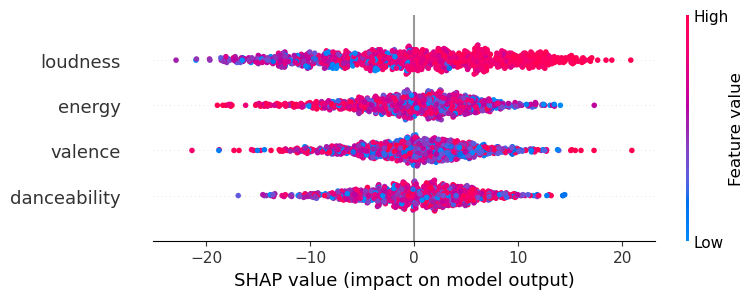

In [52]:
import shap

# Ensure xgboost is installed and imported
import xgboost as xgb

# Example: Explain predictions for the best regression model (e.g., XGBoostRegressor)
# Use the model and test data from your workflow

# Prepare feature set for SHAP (use the same features as for model training)
if 'X_test' in locals():
	X_features = X_test
elif 'selected_features' in locals():
	X_features = df[selected_features].dropna()
else:
	# Fallback: use all numeric columns except the target
	X_features = df.select_dtypes(include=['float64', 'int64']).drop(columns=['track_popularity'], errors='ignore').dropna()

# Ensure xgb_reg is defined and fitted (train a simple model if not)
from xgboost import XGBRegressor
from sklearn.utils.validation import check_is_fitted
from sklearn.exceptions import NotFittedError

need_fit = False
if 'xgb_reg' not in locals():
	need_fit = True
else:
	try:
		check_is_fitted(xgb_reg)
	except NotFittedError:
		need_fit = True

if need_fit:
	# Use y if available, otherwise fallback to the target column
	if 'y' in locals():
		y_target = y.loc[X_features.index] if hasattr(y, 'loc') else pd.Series(y, index=X_features.index)
	else:
		y_target = df.loc[X_features.index, 'track_popularity']
	xgb_reg = XGBRegressor(random_state=42)
	xgb_reg.fit(X_features, y_target)

# Create SHAP explainer for XGBoost model
explainer = shap.TreeExplainer(xgb_reg)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_features)

# Summary plot for feature importance
shap.summary_plot(shap_values, X_features, plot_type="bar")

# Detailed summary plot (beeswarm)
shap.summary_plot(shap_values, X_features)

--- 

# Statistical Tests

## Parametric Tests 

In [53]:
from scipy.stats import ttest_ind

# Parametric test: Compare mean popularity between two groups (popular vs. not popular)
# We'll use the popularity_threshold variable to split the data

group1 = df[df['track_popularity'] > popularity_threshold]['track_popularity']
group2 = df[df['track_popularity'] <= popularity_threshold]['track_popularity']

# Perform independent two-sample t-test
t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3e}")

if p_value < 0.05:
    print("Result: Statistically significant difference in mean popularity between the two groups.")
else:
    print("Result: No statistically significant difference in mean popularity between the two groups.")

T-statistic: 97.236
P-value: 0.000e+00
Result: Statistically significant difference in mean popularity between the two groups.


In [54]:
from scipy.stats import ttest_ind

# Compare mean 'duration_ms' between popular and less popular songs
popularity_threshold = 75  # already used in previous cells

group_popular = df[df['track_popularity'] > popularity_threshold]['duration_ms']
group_less_popular = df[df['track_popularity'] <= popularity_threshold]['duration_ms']

# Perform independent two-sample t-test
t_stat, p_value = ttest_ind(group_popular, group_less_popular, equal_var=False)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3e}")

if p_value < 0.05:
    print("Result: Statistically significant difference in mean duration between popular and less popular songs.")
else:
    print("Result: No statistically significant difference in mean duration between popular and less popular songs.")

T-statistic: 1.265
P-value: 2.060e-01
Result: No statistically significant difference in mean duration between popular and less popular songs.


In [55]:
from scipy.stats import pearsonr

# Calculate Pearson correlation between 'energy' and 'track_popularity'
corr, p_value = pearsonr(df['energy'], df['track_popularity'])

print(f"Pearson correlation coefficient: {corr:}")
print(f"P-value: {p_value:}")

if p_value < 0.05:
    print("Result: Statistically significant correlation between energy and track_popularity.")
else:
    print("Result: No statistically significant correlation between energy and track_popularity.")

Pearson correlation coefficient: 0.19450188304978472
P-value: 2.2185758814810828e-42
Result: Statistically significant correlation between energy and track_popularity.


---

## Non-Parametric Tests

In [56]:
from scipy.stats import mannwhitneyu

# Define popularity threshold (already used in previous cells)
popularity_threshold = 75

# Split the data into popular and not popular groups
energy_popular = df[df['track_popularity'] > popularity_threshold]['energy']
energy_not_popular = df[df['track_popularity'] <= popularity_threshold]['energy']

# Perform Mann-Whitney U test
u_stat, p_value = mannwhitneyu(energy_popular, energy_not_popular, alternative='two-sided')

print(f"Mann-Whitney U statistic: {u_stat:.3f}")
print(f"P-value: {p_value:.3e}")

if p_value < 0.05:
    print("Result: Statistically significant difference in energy between popular and not popular songs.")
else:
    print("Result: No statistically significant difference in energy between popular and not popular songs.")

Mann-Whitney U statistic: 1855222.500
P-value: 7.393e-20
Result: Statistically significant difference in energy between popular and not popular songs.


In [57]:
from scipy.stats import wilcoxon

# Define the popularity threshold and the year to split
popularity_threshold = 75
split_year = 2010  # I chose 2010 as a significant year in music due to the rise of streaming services

# Filter popular songs
popular_songs = df[df['track_popularity'] > popularity_threshold]

# Split into before and after the chosen year
before = popular_songs[popular_songs['release_year'] < split_year]['loudness']
after = popular_songs[popular_songs['release_year'] >= split_year]['loudness']

# Ensure equal length by trimming to the smallest group size
min_len = min(len(before), len(after))
if min_len < 10:
    print("Not enough data for Wilcoxon test.")
else:
    before_sample = before.sample(min_len, random_state=42)
    after_sample = after.sample(min_len, random_state=42)

    # Perform Wilcoxon signed-rank test
    stat, p_value = wilcoxon(before_sample, after_sample)
    print(f"Wilcoxon statistic: {stat:.3f}")
    print(f"P-value: {p_value:.3e}")

    if p_value < 0.05:
        print("Result: Statistically significant difference in loudness before and after the year.")
    else:
        print("Result: No statistically significant difference in loudness before and after the year.")

Wilcoxon statistic: 7695.000
P-value: 1.118e-01
Result: No statistically significant difference in loudness before and after the year.


---

# Model Selection and Training 


In [58]:
# Selecting only features relevant for the models used on classification and regression
relevant_columns = ['release_year', 'energy', 'danceability', 'valence', 'tempo', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'mode', 'key', 'time_signature', 'popularity', 'duration_ms']
y = df['track_popularity'].copy()
X = df[relevant_columns].copy()
X.head()

,release_year,energy,danceability,valence,tempo,loudness,acousticness,instrumentalness,liveness,speechiness,mode,key,time_signature,popularity,duration_ms
0,2024,0.592,0.521,0.535,157.969,-7.777,0.3080,0.0000,0.122,0.0304,0.0,6.0,3,1,251668.0
1,2024,0.507,0.747,0.438,104.978,-10.171,0.2000,0.0608,0.117,0.0358,1.0,2.0,4,1,210373.0
2,2024,0.808,0.554,0.372,108.548,-4.169,0.2140,0.0000,0.159,0.0368,1.0,1.0,4,1,166300.0
3,2024,0.910,0.670,0.786,112.966,-4.070,0.0939,0.0000,0.304,0.0634,0.0,0.0,4,1,157280.0
4,2024,0.783,0.777,0.939,149.027,-4.477,0.0283,0.0000,0.355,0.2600,0.0,0.0,4,1,169917.0


In [59]:
y.head()

0    100
1     97
2     93
3     81
4     98
Name: track_popularity, dtype: int64

In [60]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the relevant columns
scaled_columns = ['scaled_' + col for col in relevant_columns if col not in ['release_year', 'mode', 'key', 'time_signature', 'popularity']] #['release_year', 'mode', 'key', 'time_signature', 'popularity']]
X[scaled_columns] = scaler.fit_transform(df[[col for col in relevant_columns if col not in ['release_year', 'mode', 'key', 'time_signature', 'popularity']]])

# Drop the original unscaled columns and keep only the necessary ones
X = X.drop(columns=[col for col in relevant_columns if col not in ['release_year', 'mode', 'key', 'time_signature']]) #['release_year', 'mode', 'key', 'time_signature']])

# Display the first few rows to verify the scaled columns
X.head()

,release_year,mode,key,time_signature,scaled_energy,scaled_danceability,scaled_valence,scaled_tempo,scaled_loudness,scaled_acousticness,scaled_instrumentalness,scaled_liveness,scaled_speechiness,scaled_duration_ms
0,2024,0.0,6.0,3,0.593104,0.502228,0.527888,0.568015,0.815842,0.309234,0.000000,0.105428,0.009391,0.163873
1,2024,1.0,2.0,4,0.507916,0.747853,0.426572,0.293725,0.767368,0.200800,0.061352,0.100209,0.015357,0.132586
2,2024,1.0,1.0,4,0.809581,0.538094,0.357635,0.312204,0.888898,0.214857,0.000000,0.144050,0.016462,0.099194
3,2024,0.0,0.0,4,0.911806,0.664167,0.790056,0.335073,0.890902,0.094274,0.000000,0.295407,0.045851,0.092360
4,2024,0.0,0.0,4,0.784526,0.780459,0.949864,0.521729,0.882661,0.028410,0.000000,0.348643,0.263065,0.101935


In [61]:
# Define the target variable and features
y_binary = (df['track_popularity'] > 75).astype(int)  # Binary classification: popular (1) or not (0)


In [62]:
y_binary.describe()

count    4829.000000
mean        0.155933
std         0.362829
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: track_popularity, dtype: float64

In [63]:
# import necessary libraries
import numpy as np
import pandas as pd # Added for select_features
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor # Added Gradient Boosting
from sklearn.svm import SVC, SVR # Added SVM
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
import xgboost as xgb

# Feature Selection and Data Splitting Process

This step implements the initial data preparation for machine learning models. Below are the key components:

## 1. Target Variable Definition
- Renames variables for clarity
- Preserves original data structure

## 2. Classification Target Creation
- Uses median as threshold for balanced classes
- Creates binary target (0/1) for classification
- Maintains continuous target for regression

## 3. Class Distribution Analysis
- Shows threshold value used
- Displays class balance
- Helps verify data split quality

## 4. Feature Selection
- Uses RandomForest for feature importance
- Selects features above threshold (0.01)
- Returns selected features and their importance scores

## Purpose
- **Data Preparation**: Organizes data for both classification and regression tasks
- **Feature Reduction**: Identifies most relevant features for modeling
- **Balance**: Ensures balanced classes for classification
- **Transparency**: Provides clear documentation of data processing steps

## Importance
This step is crucial for:
- Reducing model complexity
- Improving model performance
- Ensuring reliable predictions
- Facilitating model interpretation

# Feature Filtering and Selection Process

## 1. Input Data
- **X_features**: Original feature matrix containing all available predictors
- **selected_features**: List of features identified as important by the RandomForest feature selection

## 2. Feature Filtering
Creates a new dataset (**X_selected**) containing only the features that:
- Showed significant importance (above 0.01 threshold)
- Were selected by the RandomForest algorithm
- Have predictive power for song popularity

## 3. Benefits
- **Dimensionality Reduction**: Reduces number of features to most important ones
- **Model Performance**: Improves model efficiency and reduces overfitting
- **Computational Efficiency**: Reduces training time and memory usage

## Importance
This step is crucial because it:
- Simplifies the model
- Removes irrelevant or redundant features
- Improves model interpretability
- Enhances prediction accuracy

The selected features will be used for both classification and regression models in subsequent steps.

In [64]:
# Apply MinMaxScaler to 'key' and 'time_signature', then drop them from the DataFrame

# Scale 'key', 'time_signature' and mode
X[['scaled_key', 'scaled_time_signature', 'scaled_mode']] = scaler.fit_transform(X[['key', 'time_signature', 'mode']])

# Drop the original 'key', 'time_signature' and 'mode' columns
X = X.drop(columns=['key', 'time_signature', 'mode', 'release_year'])

In [65]:
# Feature selection using RandomForest
def select_features(X, y, threshold=0.05):
    # Expects X as a pandas DataFrame and y as a pandas Series or numpy array
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X, y)
    
    importances = pd.DataFrame({
        'feature': X.columns,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)
    
    selected_features = importances[importances['importance'] > threshold]['feature'].tolist()
    
    return selected_features, importances

In [66]:
# Split data for both classification and regression
# It's assumed 'y' here is the continuous target variable (e.g., df['track_popularity'])
X_features = X.copy() # Renaming to avoid confusion if X is used later with a different meaning


# Use the median as threshold for more balanced classes
threshold = 0.75
y_classification_target = y_binary.copy()
y_regression_target = y.copy()

# Print class distribution
print(f"Classification threshold: {threshold}")
print("Class distribution:")
print(y_classification_target.value_counts(normalize=True))

# Feature selection (using regression target to determine feature importance)
selected_features, importance_df = select_features(X_features, y_regression_target)
print("Selected features:", selected_features)
print("\nFeature importances:")
print(importance_df)

Classification threshold: 0.75
Class distribution:
track_popularity
0    0.844067
1    0.155933
Name: proportion, dtype: float64
Selected features: ['scaled_loudness', 'scaled_instrumentalness', 'scaled_duration_ms', 'scaled_speechiness', 'scaled_danceability', 'scaled_energy', 'scaled_acousticness', 'scaled_tempo', 'scaled_valence', 'scaled_liveness']

Feature importances:
                    feature  importance
4           scaled_loudness    0.136082
6   scaled_instrumentalness    0.104261
9        scaled_duration_ms    0.103912
8        scaled_speechiness    0.089309
1       scaled_danceability    0.088705
0             scaled_energy    0.088159
5       scaled_acousticness    0.086021
3              scaled_tempo    0.085912
2            scaled_valence    0.082908
7           scaled_liveness    0.075291
10               scaled_key    0.042113
12              scaled_mode    0.009939
11    scaled_time_signature    0.007389


In [67]:
# Prepare data with selected features
X_selected = X_features[selected_features].copy()

# Machine Learning Algorithms Analysis in Spotify Song Popularity Prediction

## Classification Models

### 1. Random Forest Classifier
**Purpose**: Predicts if a song will be popular or not (binary classification)  
**Benefits**:
- Handles non-linear relationships well
- Resistant to overfitting
- Provides feature importance rankings
- Good for mixed data types (numerical and categorical)

### 2. Support Vector Classifier (SVC)
**Purpose**: Binary classification of song popularity  
**Benefits**:
- Effective in high-dimensional spaces
- Memory efficient
- Versatile through different kernel functions
- Good for clear margin of separation

### 3. Gradient Boosting Classifier
**Purpose**: Binary classification for song popularity  
**Benefits**:
- High prediction accuracy
- Handles missing data well
- Good at capturing complex patterns
- Sequential learning from previous models

## Regression Models

### 1. XGBoost Regressor
**Purpose**: Predicts exact popularity score  
**Benefits**:
- Fast execution speed
- High performance
- Built-in regularization
- Handles missing values automatically

### 2. Support Vector Regressor (SVR)
umeur**: Continuous popularity score prediction  
**Benefits**:
- Works well with non-linear relationships
- Good for moderate-sized datasets
- Less sensitive to outliers
- Effective when number of features > samples

### 3. Gradient Boosting Regressor
**Purpose**: Precise popularity score prediction  
**Benefits**:
- High prediction accuracy
- Can handle different types of predictors
- Robust to outliers
- Natural handling of mixed data types

In [68]:
X_selected.head()

,scaled_loudness,scaled_instrumentalness,scaled_duration_ms,scaled_speechiness,scaled_danceability,scaled_energy,scaled_acousticness,scaled_tempo,scaled_valence,scaled_liveness
0,0.815842,0.000000,0.163873,0.009391,0.502228,0.593104,0.309234,0.568015,0.527888,0.105428
1,0.767368,0.061352,0.132586,0.015357,0.747853,0.507916,0.200800,0.293725,0.426572,0.100209
2,0.888898,0.000000,0.099194,0.016462,0.538094,0.809581,0.214857,0.312204,0.357635,0.144050
3,0.890902,0.000000,0.092360,0.045851,0.664167,0.911806,0.094274,0.335073,0.790056,0.295407
4,0.882661,0.000000,0.101935,0.263065,0.780459,0.784526,0.028410,0.521729,0.949864,0.348643


In [69]:
# Split data with different ratios
split_ratios = [0.2, 0.3]
results = {}

for ratio in split_ratios:
    # Split data for classification
    X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
        X_selected, y_classification_target, test_size=ratio, random_state=42
    )
    # Split data for regression
    X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
        X_selected, y_regression_target, test_size=ratio, random_state=42
    )
    
    # Scale features for classification
    scaler_c = StandardScaler()
    X_train_c_scaled = scaler_c.fit_transform(X_train_c)
    X_test_c_scaled = scaler_c.transform(X_test_c)
    
    # Scale features for regression
    #scaler_r = StandardScaler()
    #X_train_r_scaled = scaler_r.fit_transform(X_train_r)
    X_train_r_scaled = X_train_r.copy()
    #X_test_r_scaled = scaler_r.transform(X_test_r)
    X_test_r_scaled = X_test_r.copy()
    
    results[f'split_{ratio}'] = {}

    # --- Classification Models ---

    # Random Forest Classifier
    rf_params = {
        'n_estimators': [100, 150], # Reduced for potentially faster run, adjust as needed
        'max_depth': [10, 20],
        'min_samples_split': [2, 5]
    }
    rf_clf = RandomForestClassifier(random_state=42)
    grid_search_rf_clf = GridSearchCV(rf_clf, rf_params, cv=3, n_jobs=-1, scoring='accuracy') # cv=3 for speed
    grid_search_rf_clf.fit(X_train_c_scaled, y_train_c)
    results[f'split_{ratio}']['RandomForestClassifier'] = {
        'best_params': grid_search_rf_clf.best_params_,
        'accuracy': accuracy_score(y_test_c, grid_search_rf_clf.predict(X_test_c_scaled)),
        'cv_scores_mean': cross_val_score(grid_search_rf_clf.best_estimator_, X_train_c_scaled, y_train_c, cv=5, n_jobs=-1, scoring='accuracy').mean()
    }
    
    # Support Vector Classifier (SVC)
    svc_params = {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'linear']
    }
    svc_clf = SVC(random_state=42, probability=True)
    grid_search_svc = GridSearchCV(svc_clf, svc_params, cv=3, n_jobs=-1, scoring='accuracy') # cv=3 for speed
    grid_search_svc.fit(X_train_c_scaled, y_train_c)
    results[f'split_{ratio}']['SVC'] = {
        'best_params': grid_search_svc.best_params_,
        'accuracy': accuracy_score(y_test_c, grid_search_svc.predict(X_test_c_scaled)),
        'cv_scores_mean': cross_val_score(grid_search_svc.best_estimator_, X_train_c_scaled, y_train_c, cv=5, n_jobs=-1, scoring='accuracy').mean()
    }

    # Gradient Boosting Classifier
    gbc_params = {
        'n_estimators': [100, 150], # Reduced for speed
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    }
    gbc_clf = GradientBoostingClassifier(random_state=42)
    grid_search_gbc = GridSearchCV(gbc_clf, gbc_params, cv=3, n_jobs=-1, scoring='accuracy') # cv=3 for speed
    grid_search_gbc.fit(X_train_c_scaled, y_train_c)
    results[f'split_{ratio}']['GradientBoostingClassifier'] = {
        'best_params': grid_search_gbc.best_params_,
        'accuracy': accuracy_score(y_test_c, grid_search_gbc.predict(X_test_c_scaled)),
        'cv_scores_mean': cross_val_score(grid_search_gbc.best_estimator_, X_train_c_scaled, y_train_c, cv=5, n_jobs=-1, scoring='accuracy').mean()
    }

    # --- Regression Models ---

    # XGBoost Regressor
    xgb_params = {
        'max_depth': [7, 15],
        'learning_rate': [0.01, 0.1],
        'n_estimators': [100, 300] # Reduced for speed
    }
    xgb_reg = xgb.XGBRegressor(random_state=42, objective='reg:squarederror')
    grid_search_xgb_reg = GridSearchCV(xgb_reg, xgb_params, cv=3, n_jobs=-1, scoring='r2') # cv=3 for speed
    grid_search_xgb_reg.fit(X_train_r_scaled, y_train_r)
    results[f'split_{ratio}']['XGBoostRegressor'] = {
        'best_params': grid_search_xgb_reg.best_params_,
        'r2_score': r2_score(y_test_r, grid_search_xgb_reg.predict(X_test_r_scaled)),
        'rmse': np.sqrt(mean_squared_error(y_test_r, grid_search_xgb_reg.predict(X_test_r_scaled))),
        'cv_scores_mean': cross_val_score(grid_search_xgb_reg.best_estimator_, X_train_r_scaled, y_train_r, cv=5, n_jobs=-1, scoring='r2').mean()
    }

    # Support Vector Regressor (SVR)
    svr_params = {
        'C': [0.1, 10, 100],
        'kernel': ['rbf', 'linear'],
        'epsilon': [0.01, 0.05, 0.1, 0.2, 0.5]# [0.1, 0.2]
    }
    svr_reg = SVR()
    grid_search_svr = GridSearchCV(svr_reg, svr_params, cv=3, n_jobs=-1, scoring='r2') # cv=3 for speed
    grid_search_svr.fit(X_train_r_scaled, y_train_r)
    results[f'split_{ratio}']['SVR'] = {
        'best_params': grid_search_svr.best_params_,
        'r2_score': r2_score(y_test_r, grid_search_svr.predict(X_test_r_scaled)),
        'rmse': np.sqrt(mean_squared_error(y_test_r, grid_search_svr.predict(X_test_r_scaled))),
        'cv_scores_mean': cross_val_score(grid_search_svr.best_estimator_, X_train_r_scaled, y_train_r, cv=5, n_jobs=-1, scoring='r2').mean()
    }

    # Gradient Boosting Regressor
    gbr_params = {
        'n_estimators': [100, 150], # Reduced for speed
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    }
    gbr_reg = GradientBoostingRegressor(random_state=42)
    grid_search_gbr = GridSearchCV(gbr_reg, gbr_params, cv=3, n_jobs=-1, scoring='r2') # cv=3 for speed
    grid_search_gbr.fit(X_train_r_scaled, y_train_r)
    results[f'split_{ratio}']['GradientBoostingRegressor'] = {
        'best_params': grid_search_gbr.best_params_,
        'r2_score': r2_score(y_test_r, grid_search_gbr.predict(X_test_r_scaled)),
        'rmse': np.sqrt(mean_squared_error(y_test_r, grid_search_gbr.predict(X_test_r_scaled))),
        'cv_scores_mean': cross_val_score(grid_search_gbr.best_estimator_, X_train_r_scaled, y_train_r, cv=5, n_jobs=-1, scoring='r2').mean()
    }

# Model Performance Evaluation and Visualization

## Key Components

### Nested Loop Structure
- **Outer loop**: Iterates through different split ratios
- **Inner loop**: Iterates through models for each split

### Metric Types
- **Classification**: Displays accuracy
- **Regression**: Shows R² score and RMSE
- **Both**: Shows cross-validation scores

### Formatting
- Organized by split ratio and model type

## Purpose
- Provides clear overview of model performance
- Enables easy comparison between models
- Shows impact of different split ratios
- Displays both training and testing metrics

This visualization helps in selecting the best performing model and understanding the impact of different data split ratios on model performance.

In [70]:
for split_label, model_metrics_dict in results.items():
    print(f"\n--- Results for {split_label} ---")
    for model_name, metrics in model_metrics_dict.items():
        print(f"\nModel: {model_name}")
        print(f"  Best parameters: {metrics['best_params']}")
        if 'accuracy' in metrics: # Classification model
            print(f"  Test accuracy: {metrics['accuracy']:.4f}")
        if 'r2_score' in metrics: # Regression model
            print(f"  R2 score: {metrics['r2_score']:.4f}")
            print(f"  RMSE: {metrics['rmse']:.4f}")
        if 'cv_scores_mean' in metrics:
            print(f"  Mean CV score: {metrics['cv_scores_mean']:.4f}")


--- Results for split_0.2 ---

Model: RandomForestClassifier
  Best parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 150}
  Test accuracy: 0.8975
  Mean CV score: 0.8789

Model: SVC
  Best parameters: {'C': 0.1, 'kernel': 'rbf'}
  Test accuracy: 0.8333
  Mean CV score: 0.8468

Model: GradientBoostingClassifier
  Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
  Test accuracy: 0.8737
  Mean CV score: 0.8677

Model: XGBoostRegressor
  Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
  R2 score: 0.1866
  RMSE: 18.1891
  Mean CV score: 0.1604

Model: SVR
  Best parameters: {'C': 100, 'epsilon': 0.01, 'kernel': 'rbf'}
  R2 score: 0.0850
  RMSE: 19.2917
  Mean CV score: 0.0912

Model: GradientBoostingRegressor
  Best parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 150}
  R2 score: 0.1757
  RMSE: 18.3114
  Mean CV score: 0.1623

--- Results for split_0.3 ---

Model: RandomForestClassifier
  Best

# Model Performance Summary Table

## Key Features
- **Comprehensive Metrics**: Shows all relevant performance measures
- **Clear Organization**: Structured by split ratio and model type
- **Missing Value Handling**: Uses NaN for inapplicable metrics
- **Parameter Display**: Shows best hyperparameters for each model
- **Model Type Distinction**: Separates classification and regression results

## Purpose
- Provides clear overview of all model performances
- Enables easy comparison between different approaches
- Shows impact of different train-test splits
- Facilitates model selection decisions

The table helps in identifying the best performing models and understanding their relative strengths across different evaluation metrics.

In [71]:
# Prepare data for the table
table_data = []
for split_label, model_metrics_dict in results.items():
    split_ratio_val = split_label.split('_')[-1]
    for model_name, metrics in model_metrics_dict.items():
        row_data = {
            'Split Ratio': split_ratio_val,
            'Model Name': model_name,
            'Best Parameters': str(metrics['best_params']), # Convert dict to string for display
            'Model Type': '',
            'Test Accuracy': np.nan,
            'CV Accuracy': np.nan,
            'Test R2 Score': np.nan,
            'Test RMSE': np.nan,
            'CV R2 Score': np.nan
        }
        if 'accuracy' in metrics: # Classification model
            row_data['Model Type'] = 'Classification'
            row_data['Test Accuracy'] = metrics.get('accuracy')
            row_data['CV Accuracy'] = metrics.get('cv_scores_mean')
        elif 'r2_score' in metrics: # Regression model
            # Based on regression models predict a binary target.
            # R2 and RMSE should be interpreted in this context.
            row_data['Model Type'] = 'Regression'
            row_data['Test R2 Score'] = metrics.get('r2_score')
            row_data['Test RMSE'] = metrics.get('rmse')
            row_data['CV R2 Score'] = metrics.get('cv_scores_mean')
        
        table_data.append(row_data)

results_summary_df = pd.DataFrame(table_data)

# Reorder columns for better readability
column_order = [
    'Split Ratio', 'Model Name', 'Model Type', 
    'Test Accuracy', 'CV Accuracy',
    'Test R2 Score', 'Test RMSE', 'CV R2 Score',
    'Best Parameters'
]
# Ensure all columns in column_order exist in the DataFrame, fill with NaN if not (though they should based on current structure)
for col in column_order:
    if col not in results_summary_df.columns:
        results_summary_df[col] = np.nan
results_summary_df = results_summary_df[column_order]

In [72]:
print("Machine Learning Model Performance Comparison Table:")
display(results_summary_df)

Machine Learning Model Performance Comparison Table:


,Split Ratio,Model Name,Model Type,Test Accuracy,CV Accuracy,Test R2 Score,Test RMSE,CV R2 Score,Best Parameters
0,0.2,RandomForestClassifier,Classification,0.897516,0.878850,NaN,NaN,NaN,"{'max_depth': 20, 'min_samples_split': 5, 'n_e..."
1,0.2,SVC,Classification,0.833333,0.846751,NaN,NaN,NaN,"{'C': 0.1, 'kernel': 'rbf'}"
2,0.2,GradientBoostingClassifier,Classification,0.873706,0.867719,NaN,NaN,NaN,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
3,0.2,XGBoostRegressor,Regression,NaN,NaN,0.186630,18.189140,0.160365,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti..."
4,0.2,SVR,Regression,NaN,NaN,0.085036,19.291680,0.091195,"{'C': 100, 'epsilon': 0.01, 'kernel': 'rbf'}"
5,0.2,GradientBoostingRegressor,Regression,NaN,NaN,0.175661,18.311371,0.162285,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est..."
6,0.3,RandomForestClassifier,Classification,0.889579,0.876627,NaN,NaN,NaN,"{'max_depth': 20, 'min_samples_split': 2, 'n_e..."
7,0.3,SVC,Classification,0.839199,0.846154,NaN,NaN,NaN,"{'C': 0.1, 'kernel': 'rbf'}"
8,0.3,GradientBoostingClassifier,Classification,0.871636,0.863314,NaN,NaN,NaN,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
9,0.3,XGBoostRegressor,Regression,NaN,NaN,0.179157,18.063445,0.155095,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est..."


# Model Performance Visualization

## Key Features
- **Multiple Plots**: Separate visualizations for different metrics
- **Split Comparison**: Shows performance across different train-test splits
- **Consistent Formatting**: Uses same style for all plots
- **Clear Labels**: Proper titles, axis labels, and legends
- **Rotated Labels**: 45-degree rotation for better readability
- **Tight Layout**: Ensures no overlapping elements

## Purpose
This visualization step helps in:
- Comparing model performances visually
- Identifying best performing models
- Understanding the impact of different split ratios
- Assessing model stability through CV scores vs test scores

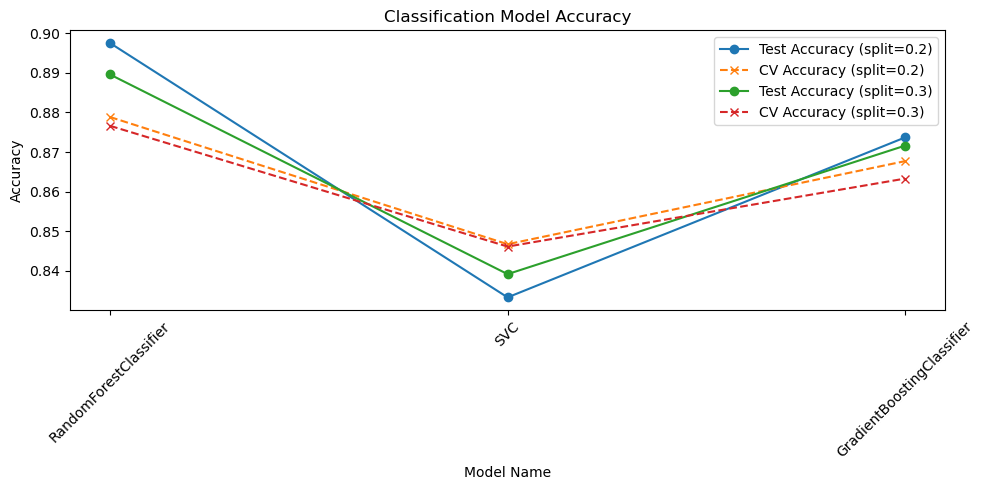

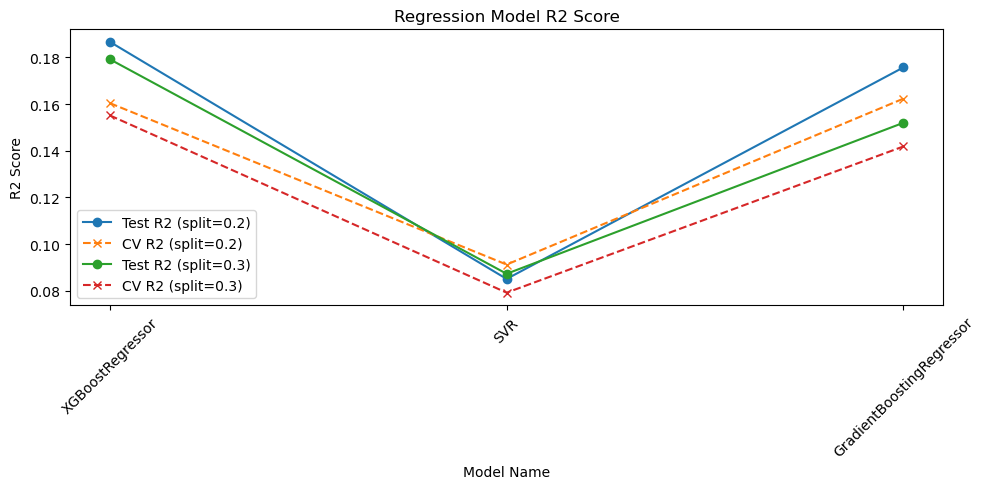

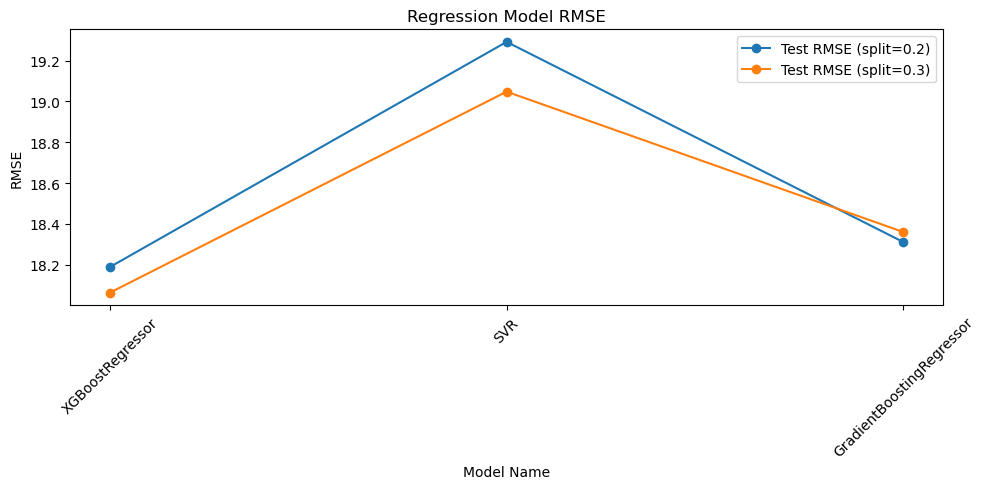

In [73]:
import matplotlib.pyplot as plt

# Classification models
classification_df = results_summary_df[results_summary_df['Model Type'] == 'Classification']

# Regression models
regression_df = results_summary_df[results_summary_df['Model Type'] == 'Regression']

# Plot classification accuracy
plt.figure(figsize=(10, 5))
for split in classification_df['Split Ratio'].unique():
    subset = classification_df[classification_df['Split Ratio'] == split]
    plt.plot(subset['Model Name'], subset['Test Accuracy'], marker='o', label=f"Test Accuracy (split={split})")
    plt.plot(subset['Model Name'], subset['CV Accuracy'], marker='x', linestyle='--', label=f"CV Accuracy (split={split})")
plt.title('Classification Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Model Name')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot regression R2 score
plt.figure(figsize=(10, 5))
for split in regression_df['Split Ratio'].unique():
    subset = regression_df[regression_df['Split Ratio'] == split]
    plt.plot(subset['Model Name'], subset['Test R2 Score'], marker='o', label=f"Test R2 (split={split})")
    plt.plot(subset['Model Name'], subset['CV R2 Score'], marker='x', linestyle='--', label=f"CV R2 (split={split})")
plt.title('Regression Model R2 Score')
plt.ylabel('R2 Score')
plt.xlabel('Model Name')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot regression RMSE
plt.figure(figsize=(10, 5))
for split in regression_df['Split Ratio'].unique():
    subset = regression_df[regression_df['Split Ratio'] == split]
    plt.plot(subset['Model Name'], subset['Test RMSE'], marker='o', label=f"Test RMSE (split={split})")
plt.title('Regression Model RMSE')
plt.ylabel('RMSE')
plt.xlabel('Model Name')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()